# Results of SRCNN Super-Resolution Experiments for Data Set 10.001

Importing packages:

In [1]:
from PIL import Image, ImageStat
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
from scipy.ndimage.filters import gaussian_filter
from sklearn.cluster import MeanShift, KMeans, estimate_bandwidth
from skimage.metrics import mean_squared_error
import matplotlib.pyplot as plt
import glob 
import random
import numpy as np
import os
import re
import cv2
import argparse
import pandas as pd
import math
import torch  
import torch.nn.functional as F 

## SRCNN

Create the data sets with results:

In [2]:
# Data Set 10.001
# PSNR
val_results_psnr_0 = pd.read_csv('/home/julia/SRCNN/results_10/val_results_psnr_all_0.csv')
val_results_psnr_1 = pd.read_csv('/home/julia/SRCNN/results_10/val_results_psnr_all_1.csv')
val_results_psnr_2 = pd.read_csv('/home/julia/SRCNN/results_10/val_results_psnr_all_2.csv')
val_results_psnr_3 = pd.read_csv('/home/julia/SRCNN/results_10/val_results_psnr_all_3.csv')
val_results_psnr_4 = pd.read_csv('/home/julia/SRCNN/results_10/val_results_psnr_all_4.csv')

# SSIM
val_results_ssim_0 = pd.read_csv('/home/julia/SRCNN/results_10/val_results_ssim_all_0.csv')
val_results_ssim_1 = pd.read_csv('/home/julia/SRCNN/results_10/val_results_ssim_all_1.csv')
val_results_ssim_2 = pd.read_csv('/home/julia/SRCNN/results_10/val_results_ssim_all_2.csv')
val_results_ssim_3 = pd.read_csv('/home/julia/SRCNN/results_10/val_results_ssim_all_3.csv')
val_results_ssim_4 = pd.read_csv('/home/julia/SRCNN/results_10/val_results_ssim_all_4.csv')

# SSSIM
val_results_sssim_0 = pd.read_csv('/home/julia/SRCNN/results_10/val_results_sssim_all_0.csv')
val_results_sssim_1 = pd.read_csv('/home/julia/SRCNN/results_10/val_results_sssim_all_1.csv')
val_results_sssim_2 = pd.read_csv('/home/julia/SRCNN/results_10/val_results_sssim_all_2.csv')
val_results_sssim_3 = pd.read_csv('/home/julia/SRCNN/results_10/val_results_sssim_all_3.csv')
val_results_sssim_4 = pd.read_csv('/home/julia/SRCNN/results_10/val_results_sssim_all_4.csv')


In [3]:
# crop the data frames
val_results_psnr_0 = val_results_psnr_0.iloc[:100,1:11]
val_results_psnr_1 = val_results_psnr_1.iloc[:100,1:11]
val_results_psnr_2 = val_results_psnr_2.iloc[:100,1:11]
val_results_psnr_3 = val_results_psnr_3.iloc[:100,1:11]
val_results_psnr_4 = val_results_psnr_4.iloc[:100,1:11]

val_results_ssim_0 = val_results_ssim_0.iloc[:100,1:11]
val_results_ssim_1 = val_results_ssim_1.iloc[:100,1:11]
val_results_ssim_2 = val_results_ssim_2.iloc[:100,1:11]
val_results_ssim_3 = val_results_ssim_3.iloc[:100,1:11]
val_results_ssim_4 = val_results_ssim_4.iloc[:100,1:11]

val_results_sssim_0 = val_results_sssim_0.iloc[:100,1:11]
val_results_sssim_1 = val_results_sssim_1.iloc[:100,1:11]
val_results_sssim_2 = val_results_sssim_2.iloc[:100,1:11]
val_results_sssim_3 = val_results_sssim_3.iloc[:100,1:11]
val_results_sssim_4 = val_results_sssim_4.iloc[:100,1:11]

In [4]:
# test set for all folds

# --------------------- Data Set 10.001

# PSNR
test_results_psnr_0 = pd.read_csv('/home/julia/SRCNN/results_10/test_results_psnr_all_0.csv')
test_results_psnr_1 = pd.read_csv('/home/julia/SRCNN/results_10/test_results_psnr_all_1.csv')
test_results_psnr_2 = pd.read_csv('/home/julia/SRCNN/results_10/test_results_psnr_all_2.csv')
test_results_psnr_3 = pd.read_csv('/home/julia/SRCNN/results_10/test_results_psnr_all_3.csv')
test_results_psnr_4 = pd.read_csv('/home/julia/SRCNN/results_10/test_results_psnr_all_4.csv')

# SSIM
test_results_ssim_0 = pd.read_csv('/home/julia/SRCNN/results_10/test_results_ssim_all_0.csv')
test_results_ssim_1 = pd.read_csv('/home/julia/SRCNN/results_10/test_results_ssim_all_1.csv')
test_results_ssim_2 = pd.read_csv('/home/julia/SRCNN/results_10/test_results_ssim_all_2.csv')
test_results_ssim_3 = pd.read_csv('/home/julia/SRCNN/results_10/test_results_ssim_all_3.csv')
test_results_ssim_4 = pd.read_csv('/home/julia/SRCNN/results_10/test_results_ssim_all_4.csv')

# SSSIM 
test_results_sssim_0 = pd.read_csv('/home/julia/SRCNN/results_10/test_results_sssim_all_0.csv')
test_results_sssim_1 = pd.read_csv('/home/julia/SRCNN/results_10/test_results_sssim_all_1.csv')
test_results_sssim_2 = pd.read_csv('/home/julia/SRCNN/results_10/test_results_sssim_all_2.csv')
test_results_sssim_3 = pd.read_csv('/home/julia/SRCNN/results_10/test_results_sssim_all_3.csv')
test_results_sssim_4 = pd.read_csv('/home/julia/SRCNN/results_10/test_results_sssim_all_4.csv')



In [5]:
# crop the data frames
test_results_psnr_0 = test_results_psnr_0.iloc[:251,1:11]
test_results_psnr_1 = test_results_psnr_1.iloc[:251,1:11]
test_results_psnr_2 = test_results_psnr_2.iloc[:251,1:11]
test_results_psnr_3 = test_results_psnr_3.iloc[:251,1:11]
test_results_psnr_4 = test_results_psnr_4.iloc[:251,1:11]

test_results_ssim_0 = test_results_ssim_0.iloc[:251,1:11]
test_results_ssim_1 = test_results_ssim_1.iloc[:251,1:11]
test_results_ssim_2 = test_results_ssim_2.iloc[:251,1:11]
test_results_ssim_3 = test_results_ssim_3.iloc[:251,1:11]
test_results_ssim_4 = test_results_ssim_4.iloc[:251,1:11]

test_results_sssim_0 = test_results_sssim_0.iloc[:251,1:11]
test_results_sssim_1 = test_results_sssim_1.iloc[:251,1:11]
test_results_sssim_2 = test_results_sssim_2.iloc[:251,1:11]
test_results_sssim_3 = test_results_sssim_3.iloc[:251,1:11]
test_results_sssim_4 = test_results_sssim_4.iloc[:251,1:11]

In [6]:
# train set for all folds

# --------------- Data Set 10.001

# PSNR
train_results_psnr_0 = pd.read_csv('/home/julia/SRCNN/results_10/train_results_psnr_all_0.csv')
train_results_psnr_1 = pd.read_csv('/home/julia/SRCNN/results_10/train_results_psnr_all_1.csv')
train_results_psnr_2 = pd.read_csv('/home/julia/SRCNN/results_10/train_results_psnr_all_2.csv')
train_results_psnr_3 = pd.read_csv('/home/julia/SRCNN/results_10/train_results_psnr_all_3.csv')
train_results_psnr_4 = pd.read_csv('/home/julia/SRCNN/results_10/train_results_psnr_all_4.csv')

# SSIM
train_results_ssim_0 = pd.read_csv('/home/julia/SRCNN/results_10/train_results_ssim_all_0.csv')
train_results_ssim_1 = pd.read_csv('/home/julia/SRCNN/results_10/train_results_ssim_all_1.csv')
train_results_ssim_2 = pd.read_csv('/home/julia/SRCNN/results_10/train_results_ssim_all_2.csv')
train_results_ssim_3 = pd.read_csv('/home/julia/SRCNN/results_10/train_results_ssim_all_3.csv')
train_results_ssim_4 = pd.read_csv('/home/julia/SRCNN/results_10/train_results_ssim_all_4.csv')

# SSSIM
train_results_sssim_0 = pd.read_csv('/home/julia/SRCNN/results_10/train_results_sssim_all_0.csv')
train_results_sssim_1 = pd.read_csv('/home/julia/SRCNN/results_10/train_results_sssim_all_1.csv')
train_results_sssim_2 = pd.read_csv('/home/julia/SRCNN/results_10/train_results_sssim_all_2.csv')
train_results_sssim_3 = pd.read_csv('/home/julia/SRCNN/results_10/train_results_sssim_all_3.csv')
train_results_sssim_4 = pd.read_csv('/home/julia/SRCNN/results_10/train_results_sssim_all_4.csv')



In [7]:
# crop the data frames
train_results_psnr_0 = train_results_psnr_0.iloc[:901,1:11]
train_results_psnr_1 = train_results_psnr_1.iloc[:901,1:11]
train_results_psnr_2 = train_results_psnr_2.iloc[:901,1:11]
train_results_psnr_3 = train_results_psnr_3.iloc[:901,1:11]
train_results_psnr_4 = train_results_psnr_4.iloc[:901,1:11]

train_results_ssim_0 = train_results_ssim_0.iloc[:901,1:11]
train_results_ssim_1 = train_results_ssim_1.iloc[:901,1:11]
train_results_ssim_2 = train_results_ssim_2.iloc[:901,1:11]
train_results_ssim_3 = train_results_ssim_3.iloc[:901,1:11]
train_results_ssim_4 = train_results_ssim_4.iloc[:901,1:11]

train_results_sssim_0 = train_results_sssim_0.iloc[:901,1:11]
train_results_sssim_1 = train_results_sssim_1.iloc[:901,1:11]
train_results_sssim_2 = train_results_sssim_2.iloc[:901,1:11]
train_results_sssim_3 = train_results_sssim_3.iloc[:901,1:11]
train_results_sssim_4 = train_results_sssim_4.iloc[:901,1:11]

## Visualize Validation data sets

### SSIM / SSSIM Scores for all n-folds separately

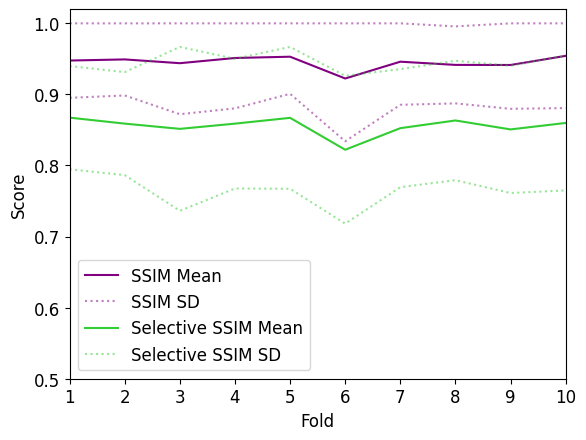

In [8]:
ssim_means = val_results_ssim_0.mean()
ssim_stds = val_results_ssim_0.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = val_results_sssim_0.mean()
sssim_stds = val_results_sssim_0.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10/ssim_val_0.png")

In [9]:
print(ssim_means,ssim_stds)

0    0.947669
1    0.949237
2    0.943929
3    0.951246
4    0.953054
5    0.922404
6    0.946047
7    0.941531
8    0.941393
9    0.954246
dtype: float64 0    0.052455
1    0.050720
2    0.071788
3    0.070860
4    0.052208
5    0.088348
6    0.060650
7    0.054154
8    0.061665
9    0.073480
dtype: float64


In [10]:
print(sssim_means,sssim_stds)

0    0.867303
1    0.858903
2    0.851536
3    0.858897
4    0.867030
5    0.822174
6    0.852517
7    0.863335
8    0.850767
9    0.859844
dtype: float64 0    0.072606
1    0.072456
2    0.115302
3    0.091236
4    0.099797
5    0.104005
6    0.083044
7    0.084024
8    0.089484
9    0.094873
dtype: float64


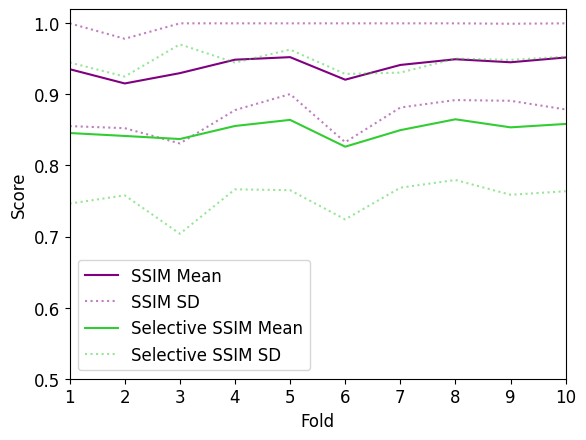

In [11]:
ssim_means = val_results_ssim_1.mean()
ssim_stds = val_results_ssim_1.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = val_results_sssim_1.mean()
sssim_stds = val_results_sssim_1.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10/ssim_val_1.png")

In [12]:
print(ssim_means,ssim_stds)

0    0.935510
1    0.915418
2    0.929929
3    0.948869
4    0.952432
5    0.920700
6    0.941453
7    0.949472
8    0.945227
9    0.951964
dtype: float64 0    0.080093
1    0.062890
2    0.098905
3    0.070931
4    0.051968
5    0.087963
6    0.059907
7    0.057409
8    0.054190
9    0.073113
dtype: float64


In [13]:
print(sssim_means,ssim_stds)

0    0.845665
1    0.841565
2    0.837232
3    0.855592
4    0.864167
5    0.826463
6    0.849724
7    0.865002
8    0.853671
9    0.858446
dtype: float64 0    0.080093
1    0.062890
2    0.098905
3    0.070931
4    0.051968
5    0.087963
6    0.059907
7    0.057409
8    0.054190
9    0.073113
dtype: float64


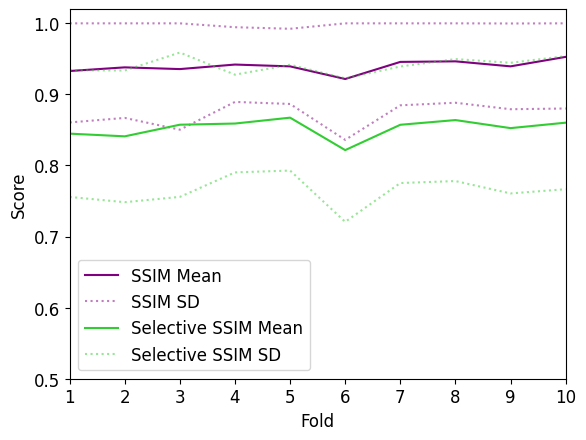

In [14]:
ssim_means = val_results_ssim_2.mean()
ssim_stds = val_results_ssim_2.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = val_results_sssim_2.mean()
sssim_stds = val_results_sssim_2.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10/ssim_val_2.png")

In [15]:
print(ssim_means,ssim_stds)

0    0.932936
1    0.938064
2    0.935639
3    0.942006
4    0.939451
5    0.921687
6    0.945737
7    0.946532
8    0.939477
9    0.952787
dtype: float64 0    0.072371
1    0.071134
2    0.085278
3    0.052554
4    0.052891
5    0.085654
6    0.061076
7    0.058267
8    0.060319
9    0.072615
dtype: float64


In [16]:
print(sssim_means,sssim_stds )

0    0.844816
1    0.841026
2    0.857375
3    0.859035
4    0.867291
5    0.821649
6    0.857295
7    0.863911
8    0.852593
9    0.860241
dtype: float64 0    0.089065
1    0.092657
2    0.101542
3    0.068736
4    0.074436
5    0.100925
6    0.081980
7    0.085812
8    0.091899
9    0.093609
dtype: float64


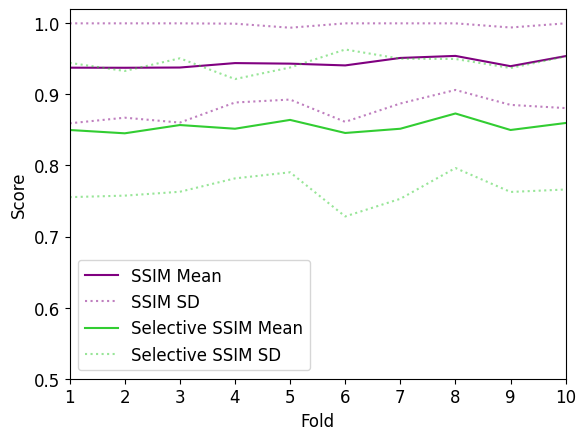

In [17]:
ssim_means = val_results_ssim_3.mean()
ssim_stds = val_results_ssim_3.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = val_results_sssim_3.mean()
sssim_stds = val_results_sssim_3.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10/ssim_val_3.png")

In [18]:
print(ssim_means, ssim_stds)

0    0.937616
1    0.937495
2    0.937835
3    0.944074
4    0.943294
5    0.940804
6    0.951318
7    0.954180
8    0.939701
9    0.953907
dtype: float64 0    0.078286
1    0.070248
2    0.077455
3    0.055441
4    0.050543
5    0.079406
6    0.064111
7    0.047893
8    0.054445
9    0.073163
dtype: float64


In [19]:
print(sssim_means, sssim_stds )

0    0.849934
1    0.845280
2    0.856917
3    0.851720
4    0.864138
5    0.845751
6    0.851701
7    0.873164
8    0.849940
9    0.859788
dtype: float64 0    0.094460
1    0.087676
2    0.093876
3    0.069878
4    0.073705
5    0.117441
6    0.098570
7    0.076709
8    0.087175
9    0.093559
dtype: float64


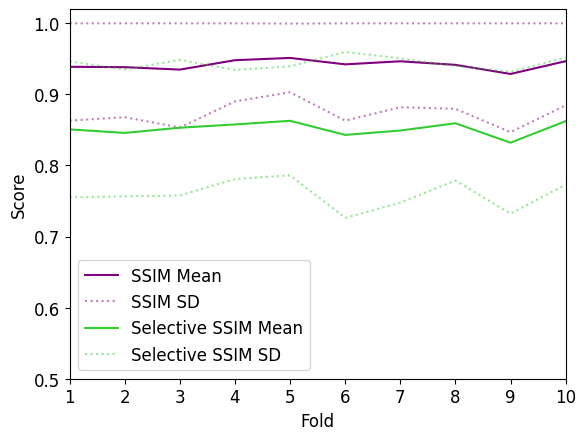

In [20]:
ssim_means = val_results_ssim_4.mean()
ssim_stds = val_results_ssim_4.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = val_results_sssim_4.mean()
sssim_stds = val_results_sssim_4.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10/ssim_val_4.png")

In [21]:
print(ssim_means, ssim_stds)

0    0.938869
1    0.938324
2    0.934913
3    0.948149
4    0.951332
5    0.942293
6    0.946624
7    0.941606
8    0.928797
9    0.946760
dtype: float64 0    0.075748
1    0.070363
2    0.081453
3    0.057980
4    0.048289
5    0.079190
6    0.064630
7    0.061817
8    0.081902
9    0.062179
dtype: float64


In [22]:
print(sssim_means,sssim_stds )

0    0.850806
1    0.845834
2    0.853177
3    0.857741
4    0.862866
5    0.843032
6    0.849180
7    0.859381
8    0.832093
9    0.862388
dtype: float64 0    0.095681
1    0.089271
2    0.095404
3    0.076700
4    0.076670
5    0.116685
6    0.101554
7    0.080496
8    0.099901
9    0.089288
dtype: float64


### PSNR results for all n-folds separately

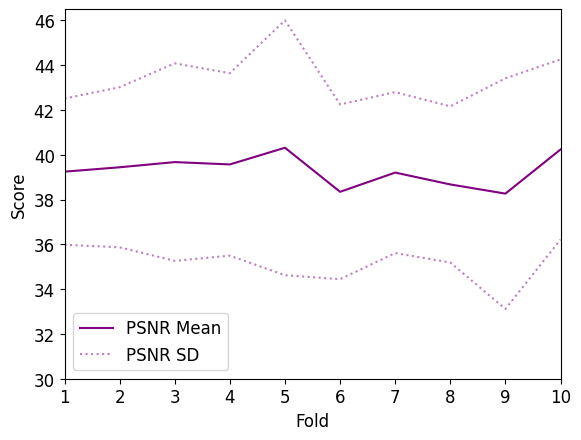

In [24]:
psnr_means = val_results_psnr_0.mean()
psnr_stds = val_results_psnr_0.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=46.5)
plt.savefig("srcnn_results_10/psnr_val_0.png")

In [25]:
print(psnr_means, psnr_stds)

0    39.243748
1    39.439434
2    39.670987
3    39.566801
4    40.311403
5    38.344509
6    39.202410
7    38.673430
8    38.263606
9    40.233980
dtype: float64 0    3.264595
1    3.573856
2    4.407485
3    4.073640
4    5.690676
5    3.900002
6    3.592895
7    3.484911
8    5.147951
9    4.021312
dtype: float64


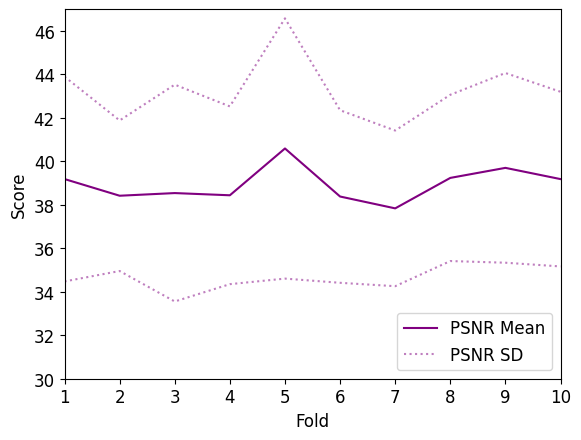

In [32]:
psnr_means = val_results_psnr_1.mean()
psnr_stds = val_results_psnr_1.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12, loc="lower right")
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=47)
plt.savefig("srcnn_results_10/psnr_val_1.png")

In [33]:
print(psnr_means, psnr_stds)

0    39.184154
1    38.416763
2    38.539022
3    38.437502
4    40.590304
5    38.380442
6    37.835468
7    39.236727
8    39.698486
9    39.181939
dtype: float64 0    4.709850
1    3.462977
2    4.986606
3    4.088048
4    5.985206
5    3.968681
6    3.579668
7    3.823979
8    4.362887
9    4.017282
dtype: float64


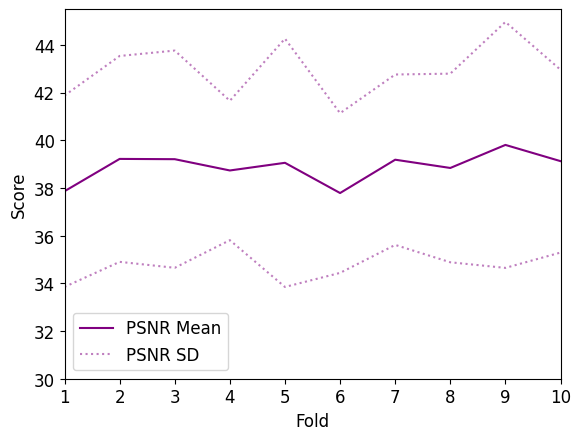

In [36]:
psnr_means = val_results_psnr_2.mean()
psnr_stds = val_results_psnr_2.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=45.5)
plt.savefig("srcnn_results_10/psnr_val_2.png")

In [37]:
print(psnr_means, psnr_stds)

0    37.862888
1    39.218256
2    39.206809
3    38.733484
4    39.054713
5    37.787232
6    39.184963
7    38.838503
8    39.805156
9    39.124497
dtype: float64 0    4.012805
1    4.317106
2    4.554958
3    2.923213
4    5.207004
5    3.348347
6    3.573166
7    3.955133
8    5.157169
9    3.833113
dtype: float64


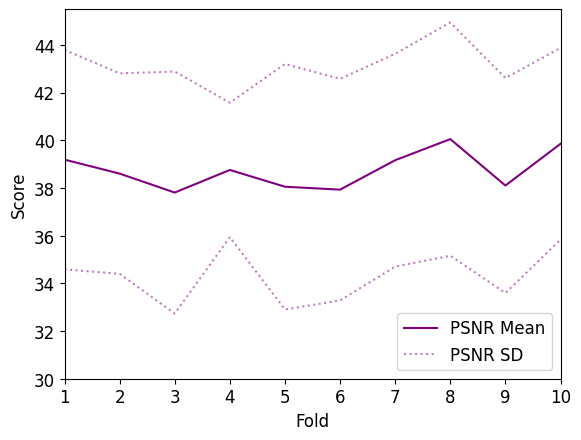

In [38]:
psnr_means = val_results_psnr_3.mean()
psnr_stds = val_results_psnr_3.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=45.5)
plt.savefig("srcnn_results_10/psnr_val_3.png")

In [39]:
print(psnr_means, psnr_stds)

0    39.187791
1    38.601955
2    37.807935
3    38.755384
4    38.051695
5    37.929486
6    39.164022
7    40.048799
8    38.101953
9    39.852187
dtype: float64 0    4.600012
1    4.204165
2    5.073093
3    2.819941
4    5.147376
5    4.646231
6    4.463567
7    4.890497
8    4.506941
9    4.019591
dtype: float64


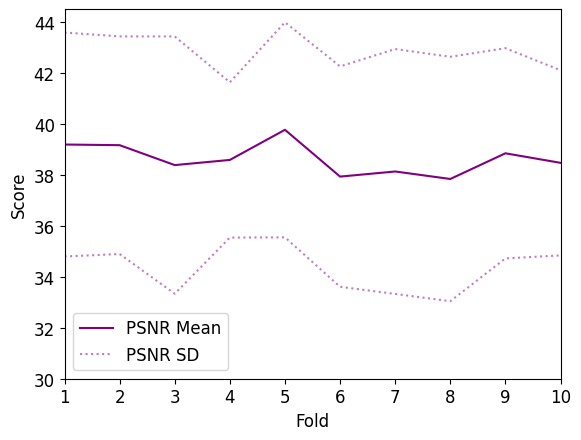

In [42]:
psnr_means = val_results_psnr_4.mean()
psnr_stds = val_results_psnr_4.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=44.5)
plt.savefig("srcnn_results_10/psnr_val_4.png")

In [43]:
print(psnr_means, psnr_stds)

0    39.188310
1    39.162166
2    38.380998
3    38.583641
4    39.765617
5    37.929597
6    38.130240
7    37.836237
8    38.843694
9    38.469604
dtype: float64 0    4.393349
1    4.268987
2    5.046991
3    3.046228
4    4.218594
5    4.323528
6    4.802880
7    4.794916
8    4.123699
9    3.632555
dtype: float64


## Visualize Test Set

### SSIM / SSSIM Comparison for each n-fold

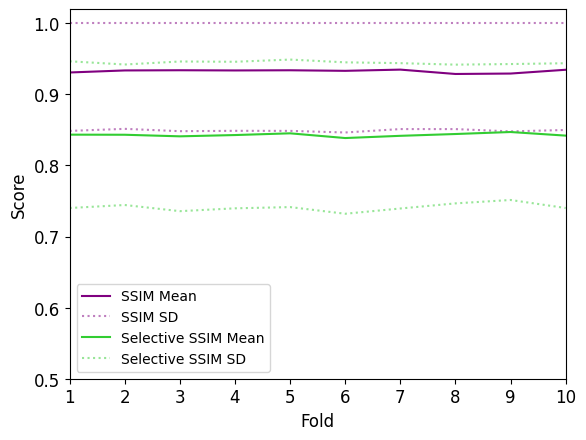

In [44]:
ssim_means = test_results_ssim_0.mean()
ssim_stds = test_results_ssim_0.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = test_results_sssim_0.mean()
sssim_stds = test_results_sssim_0.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10/ssim_test_0.png")

In [45]:
print(ssim_means, ssim_stds)

0    0.930870
1    0.933721
2    0.934006
3    0.933713
4    0.933966
5    0.933176
6    0.934887
7    0.928755
8    0.929355
9    0.934674
dtype: float64 0    0.082218
1    0.082168
2    0.085748
3    0.084935
4    0.085269
5    0.086732
6    0.083652
7    0.077547
8    0.081362
9    0.084726
dtype: float64


In [46]:
print(sssim_means,sssim_stds)

0    0.843385
1    0.843248
2    0.841031
3    0.842831
4    0.845249
5    0.838620
6    0.841743
7    0.844287
8    0.847099
9    0.842031
dtype: float64 0    0.103207
1    0.098843
2    0.105280
3    0.103094
4    0.103772
5    0.106512
6    0.102244
7    0.097599
8    0.095617
9    0.101840
dtype: float64


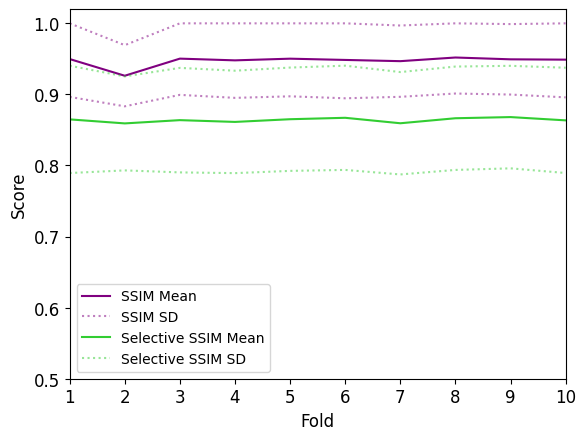

In [47]:
ssim_means = test_results_ssim_1.mean()
ssim_stds = test_results_ssim_1.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = test_results_sssim_1.mean()
sssim_stds = test_results_sssim_1.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10/ssim_test_1.png")

In [48]:
print(ssim_means, ssim_stds)

0    0.949765
1    0.926262
2    0.950345
3    0.947921
4    0.950280
5    0.948512
6    0.946786
7    0.951920
8    0.949377
9    0.948910
dtype: float64 0    0.053252
1    0.043021
2    0.050983
3    0.052766
4    0.052960
5    0.053959
6    0.050157
7    0.050674
8    0.049565
9    0.053057
dtype: float64


In [49]:
print(sssim_means,sssim_stds)

0    0.864878
1    0.859220
2    0.863807
3    0.861304
4    0.865098
5    0.867099
6    0.859420
7    0.866474
8    0.868108
9    0.863493
dtype: float64 0    0.075507
1    0.066114
2    0.073518
3    0.072060
4    0.072678
5    0.073327
6    0.072018
7    0.072718
8    0.072119
9    0.074065
dtype: float64


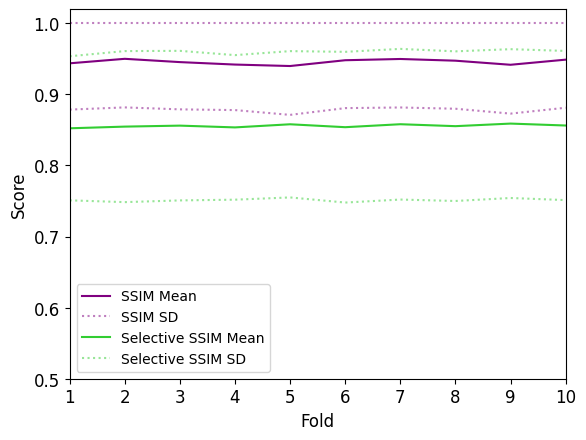

In [50]:
ssim_means = test_results_ssim_2.mean()
ssim_stds = test_results_ssim_2.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = test_results_sssim_2.mean()
sssim_stds = test_results_sssim_2.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10/ssim_test_2.png")

In [51]:
print(ssim_means, ssim_stds)

0    0.943762
1    0.950082
2    0.945457
3    0.942004
4    0.939940
5    0.948093
6    0.949851
7    0.947445
8    0.941705
9    0.948904
dtype: float64 0    0.065123
1    0.068356
2    0.066484
3    0.064055
4    0.068726
5    0.067376
6    0.068224
7    0.067609
8    0.068717
9    0.067646
dtype: float64


In [52]:
print(sssim_means,sssim_stds)

0    0.852330
1    0.854702
2    0.856085
3    0.853588
4    0.857985
5    0.853882
6    0.858058
7    0.855329
8    0.858959
9    0.856249
dtype: float64 0    0.101351
1    0.106257
2    0.105211
3    0.101692
4    0.102924
5    0.106022
6    0.105979
7    0.105263
8    0.104689
9    0.104944
dtype: float64


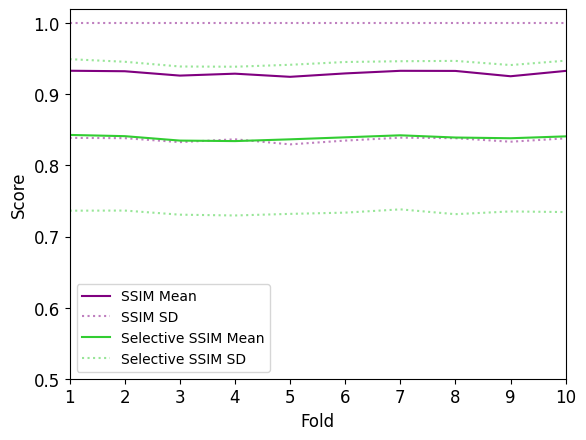

In [53]:
ssim_means = test_results_ssim_3.mean()
ssim_stds = test_results_ssim_3.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = test_results_sssim_3.mean()
sssim_stds = test_results_sssim_3.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10/ssim_test_3.png")

In [54]:
print(ssim_means, ssim_stds)

0    0.933298
1    0.932607
2    0.926473
3    0.929174
4    0.924752
5    0.929548
6    0.933200
7    0.933041
8    0.925557
9    0.933065
dtype: float64 0    0.094451
1    0.094170
2    0.093625
3    0.092308
4    0.095030
5    0.094518
6    0.094061
7    0.094650
8    0.092101
9    0.094902
dtype: float64


In [55]:
print(sssim_means,sssim_stds)

0    0.842999
1    0.841265
2    0.835041
3    0.834326
4    0.836808
5    0.839639
6    0.842473
7    0.839344
8    0.838331
9    0.840972
dtype: float64 0    0.106577
1    0.104672
2    0.104248
3    0.104647
4    0.104882
5    0.105963
6    0.104207
7    0.107826
8    0.102975
9    0.106504
dtype: float64


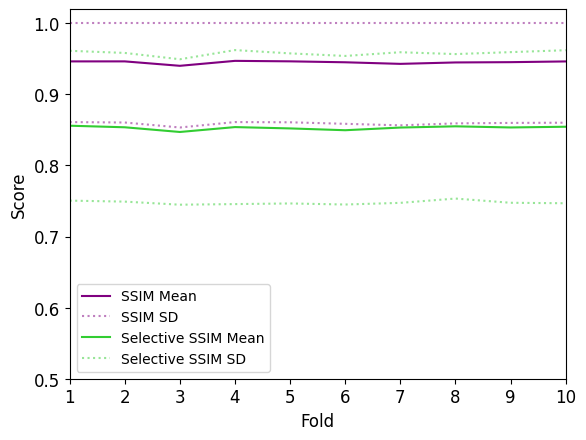

In [56]:
ssim_means = test_results_ssim_4.mean()
ssim_stds = test_results_ssim_4.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = test_results_sssim_4.mean()
sssim_stds = test_results_sssim_4.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10/ssim_test_4.png")

In [57]:
print(ssim_means, ssim_stds)

0    0.946453
1    0.946473
2    0.940247
3    0.947199
4    0.946531
5    0.945210
6    0.942979
7    0.944976
8    0.945379
9    0.946401
dtype: float64 0    0.085395
1    0.086000
2    0.086786
3    0.086115
4    0.085754
5    0.086569
6    0.086492
7    0.085743
8    0.085481
9    0.086210
dtype: float64


In [58]:
print(sssim_means,sssim_stds)

0    0.855969
1    0.853763
2    0.847148
3    0.854030
4    0.852155
5    0.849615
6    0.853382
7    0.855112
8    0.853514
9    0.854521
dtype: float64 0    0.105397
1    0.104593
2    0.102312
3    0.108334
4    0.105565
5    0.104511
6    0.105959
7    0.101633
8    0.105967
9    0.107660
dtype: float64


### SSIM / SSSIM Comparison for all n-folds

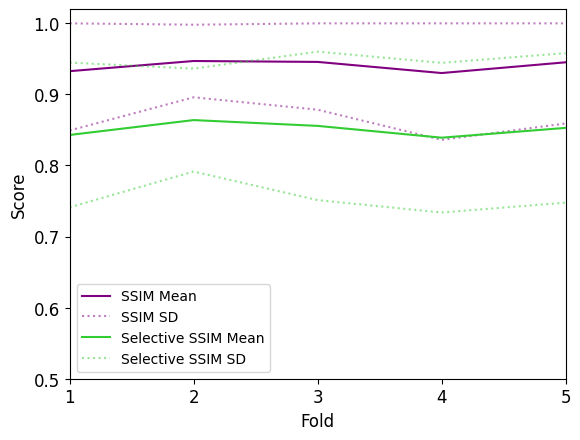

In [61]:
ssim_means_0 = test_results_ssim_0.mean()
ssim_std_0 = test_results_ssim_0.std()
ssim_std_upper_0 = ssim_means_0 + ssim_std_0
ssim_std_lower_0 = ssim_means_0 - ssim_std_0
ssim_means_0 = ssim_means_0.mean()
ssim_std_0 = ssim_std_0.mean()
ssim_std_upper_0 = ssim_std_upper_0.mean()
ssim_std_lower_0 = ssim_std_lower_0.mean()

ssim_means_1 = test_results_ssim_1.mean()
ssim_std_1 = test_results_ssim_1.std()
ssim_std_upper_1 = ssim_means_1 + ssim_std_1
ssim_std_lower_1 = ssim_means_1 - ssim_std_1
ssim_means_1 = ssim_means_1.mean()
ssim_std_1 = ssim_std_1.mean()
ssim_std_upper_1 = ssim_std_upper_1.mean()
ssim_std_lower_1 = ssim_std_lower_1.mean()

ssim_means_2 = test_results_ssim_2.mean()
ssim_std_2 = test_results_ssim_2.std()
ssim_std_upper_2 = ssim_means_2 + ssim_std_2
ssim_std_lower_2 = ssim_means_2 - ssim_std_2
ssim_means_2 = ssim_means_2.mean()
ssim_std_2 = ssim_std_2.mean()
ssim_std_upper_2 = ssim_std_upper_2.mean()
ssim_std_lower_2 = ssim_std_lower_2.mean()

ssim_means_3 = test_results_ssim_3.mean()
ssim_std_3 = test_results_ssim_3.std()
ssim_std_upper_3 = ssim_means_3 + ssim_std_3
ssim_std_lower_3 = ssim_means_3 - ssim_std_3
ssim_means_3 = ssim_means_3.mean()
ssim_std_3 = ssim_std_3.mean()
ssim_std_upper_3 = ssim_std_upper_3.mean()
ssim_std_lower_3 = ssim_std_lower_3.mean()

ssim_means_4 = test_results_ssim_4.mean()
ssim_std_4 = test_results_ssim_4.std()
ssim_std_upper_4 = ssim_means_4 + ssim_std_4
ssim_std_lower_4 = ssim_means_4 - ssim_std_4
ssim_means_4 = ssim_means_4.mean()
ssim_std_4 = ssim_std_4.mean()
ssim_std_upper_4 = ssim_std_upper_4.mean()
ssim_std_lower_4 = ssim_std_lower_4.mean()

ssim_means = [ssim_means_0, ssim_means_1, ssim_means_2, ssim_means_3, ssim_means_4]
ssim_stds = [ssim_std_0, ssim_std_1, ssim_std_2, ssim_std_3, ssim_std_4]
ssim_std_upper = [ssim_std_upper_0, ssim_std_upper_1, ssim_std_upper_2, ssim_std_upper_3, ssim_std_upper_4]
ssim_std_lower = [ssim_std_lower_0, ssim_std_lower_1, ssim_std_lower_2, ssim_std_lower_3, ssim_std_lower_4]

for i in range(len(ssim_std_upper)):
    if ssim_std_upper[i] > 1:
        ssim_std_upper[i] = 1

sssim_means_0 = test_results_sssim_0.mean()
sssim_std_0 = test_results_sssim_0.std()
sssim_std_upper_0 = sssim_means_0 + sssim_std_0
sssim_std_lower_0 = sssim_means_0 - sssim_std_0
sssim_means_0 = sssim_means_0.mean()
sssim_std_0 = sssim_std_0.mean()
sssim_std_upper_0 = sssim_std_upper_0.mean()
sssim_std_lower_0 = sssim_std_lower_0.mean()

sssim_means_1 = test_results_sssim_1.mean()
sssim_std_1 = test_results_sssim_1.std()
sssim_std_upper_1 = sssim_means_1 + sssim_std_1
sssim_std_lower_1 = sssim_means_1 - sssim_std_1
sssim_means_1 = sssim_means_1.mean()
sssim_std_1 = sssim_std_1.mean()
sssim_std_upper_1 = sssim_std_upper_1.mean()
sssim_std_lower_1 = sssim_std_lower_1.mean()

sssim_means_2 = test_results_sssim_2.mean()
sssim_std_2 = test_results_sssim_2.std()
sssim_std_upper_2 = sssim_means_2 + sssim_std_2
sssim_std_lower_2 = sssim_means_2 - sssim_std_2
sssim_means_2 = sssim_means_2.mean()
sssim_std_2 = sssim_std_2.mean()
sssim_std_upper_2 = sssim_std_upper_2.mean()
sssim_std_lower_2 = sssim_std_lower_2.mean()

sssim_means_3 = test_results_sssim_3.mean()
sssim_std_3 = test_results_sssim_3.std()
sssim_std_upper_3 = sssim_means_3 + sssim_std_3
sssim_std_lower_3 = sssim_means_3 - sssim_std_3
sssim_means_3 = sssim_means_3.mean()
sssim_std_3 = sssim_std_3.mean()
sssim_std_upper_3 = sssim_std_upper_3.mean()
sssim_std_lower_3 = sssim_std_lower_3.mean()

sssim_means_4 = test_results_sssim_4.mean()
sssim_std_4 = test_results_sssim_4.std()
sssim_std_upper_4 = sssim_means_4 + sssim_std_4
sssim_std_lower_4 = sssim_means_4 - sssim_std_4
sssim_means_4 = sssim_means_4.mean()
sssim_std_4 = sssim_std_4.mean()
sssim_std_upper_4 = sssim_std_upper_4.mean()
sssim_std_lower_4 = sssim_std_lower_4.mean()

sssim_means = [sssim_means_0, sssim_means_1, sssim_means_2, sssim_means_3, sssim_means_4]
sssim_stds = [sssim_std_0, sssim_std_1, sssim_std_2, sssim_std_3, sssim_std_4]
sssim_std_upper = [sssim_std_upper_0, sssim_std_upper_1, sssim_std_upper_2, sssim_std_upper_3, sssim_std_upper_4]
sssim_std_lower = [sssim_std_lower_0, sssim_std_lower_1, sssim_std_lower_2, sssim_std_lower_3, sssim_std_lower_4]

for i in range(len(sssim_std_upper)):
    if sssim_std_upper[i] > 1:
        sssim_std_upper[i] = 1

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(n_folds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(n_folds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(n_folds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],["1","2","3","4","5"], fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10/ssim_test_mean_all_folds.png")

In [62]:
print(ssim_means, ssim_stds)

[0.9327123400937039, 0.9470077394251805, 0.9457243325938267, 0.9300714525568534, 0.9451847369927332] [0.0834356696326098, 0.05103923896307723, 0.0672315022155379, 0.09398142630171656, 0.08605436538108882]


In [63]:
print(sssim_means, sssim_stds)

[0.8429524613329139, 0.8638899932582065, 0.855716598265437, 0.8391197298864919, 0.8529207400829193] [0.10180078126435803, 0.07241239490120877, 0.1044331255604956, 0.10525016251717138, 0.10519297009785422]


### SSSIM/SSIM Comparison over all n-folds


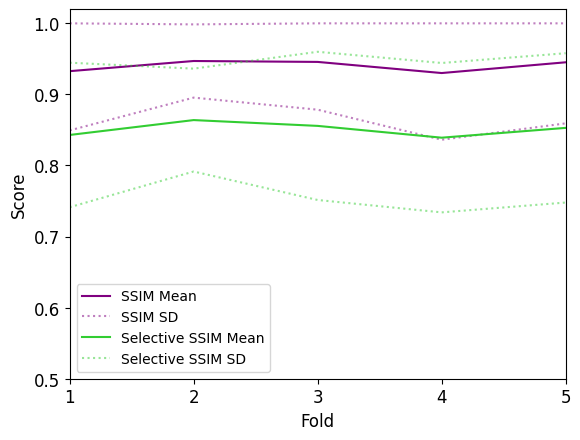

In [20]:
fold_0_test_ssim = np.array(test_results_ssim_0).reshape(-1,1)
fold_1_test_ssim = np.array(test_results_ssim_1).reshape(-1,1)
fold_2_test_ssim = np.array(test_results_ssim_2).reshape(-1,1)
fold_3_test_ssim = np.array(test_results_ssim_3).reshape(-1,1)
fold_4_test_ssim = np.array(test_results_ssim_4).reshape(-1,1)

ssim_means_0 = np.mean(fold_0_test_ssim)
ssim_std_0 = np.std(fold_0_test_ssim)
ssim_std_upper_0 = ssim_means_0 + ssim_std_0
ssim_std_lower_0 = ssim_means_0 - ssim_std_0
if ssim_std_upper_0 > 1:
    ssim_std_upper_0 = 1

ssim_means_1 = np.mean(fold_1_test_ssim)
ssim_std_1 = np.std(fold_1_test_ssim)
ssim_std_upper_1 = ssim_means_1 + ssim_std_1
ssim_std_lower_1 = ssim_means_1 - ssim_std_1
if ssim_std_upper_1 > 1:
    ssim_std_upper_1 = 1

ssim_means_2 = np.mean(fold_2_test_ssim)
ssim_std_2 = np.std(fold_2_test_ssim)
ssim_std_upper_2 = ssim_means_2 + ssim_std_2
ssim_std_lower_2 = ssim_means_2 - ssim_std_2
if ssim_std_upper_2 > 1:
    ssim_std_upper_2 = 1

ssim_means_3 = np.mean(fold_3_test_ssim)
ssim_std_3 = np.std(fold_3_test_ssim)
ssim_std_upper_3 = ssim_means_3 + ssim_std_3
ssim_std_lower_3 = ssim_means_3 - ssim_std_3
if ssim_std_upper_3 > 1:
    ssim_std_upper_3 = 1

ssim_means_4 = np.mean(fold_4_test_ssim)
ssim_std_4 = np.std(fold_4_test_ssim)
ssim_std_upper_4 = ssim_means_4 + ssim_std_4
ssim_std_lower_4 = ssim_means_4 - ssim_std_4
if ssim_std_upper_4 > 1:
    ssim_std_upper_4 = 1
    
ssim_means = [ssim_means_0, ssim_means_1, ssim_means_2, ssim_means_3, ssim_means_4]
ssim_stds = [ssim_std_0, ssim_std_1, ssim_std_2, ssim_std_3, ssim_std_4]
ssim_std_upper = [ssim_std_upper_0, ssim_std_upper_1, ssim_std_upper_2, ssim_std_upper_3, ssim_std_upper_4]
ssim_std_lower = [ssim_std_lower_0, ssim_std_lower_1, ssim_std_lower_2, ssim_std_lower_3, ssim_std_lower_4]

fold_0_test_sssim = np.array(test_results_sssim_0).reshape(-1,1)
fold_1_test_sssim = np.array(test_results_sssim_1).reshape(-1,1)
fold_2_test_sssim = np.array(test_results_sssim_2).reshape(-1,1)
fold_3_test_sssim = np.array(test_results_sssim_3).reshape(-1,1)
fold_4_test_sssim = np.array(test_results_sssim_4).reshape(-1,1)

sssim_means_0 = np.mean(fold_0_test_sssim)
sssim_std_0 = np.std(fold_0_test_sssim)
sssim_std_upper_0 = sssim_means_0 + sssim_std_0
sssim_std_lower_0 = sssim_means_0 - sssim_std_0
if sssim_std_upper_0 > 1:
    sssim_std_upper_0 = 1

sssim_means_1 = np.mean(fold_1_test_sssim)
sssim_std_1 = np.std(fold_1_test_sssim)
sssim_std_upper_1 = sssim_means_1 + sssim_std_1
sssim_std_lower_1 = sssim_means_1 - sssim_std_1
if sssim_std_upper_1 > 1:
    sssim_std_upper_1 = 1

sssim_means_2 = np.mean(fold_2_test_sssim)
sssim_std_2 = np.std(fold_2_test_sssim)
sssim_std_upper_2 = sssim_means_2 + sssim_std_2
sssim_std_lower_2 = sssim_means_2 - sssim_std_2
if sssim_std_upper_2 > 1:
    sssim_std_upper_2 = 1

sssim_means_3 = np.mean(fold_3_test_sssim)
sssim_std_3 = np.std(fold_3_test_sssim)
sssim_std_upper_3 = sssim_means_3 + sssim_std_3
sssim_std_lower_3 = sssim_means_3 - sssim_std_3
if sssim_std_upper_3 > 1:
    sssim_std_upper_3 = 1

sssim_means_4 = np.mean(fold_4_test_sssim)
sssim_std_4 = np.std(fold_4_test_sssim)
sssim_std_upper_4 = sssim_means_4 + sssim_std_4
sssim_std_lower_4 = sssim_means_4 - sssim_std_4
if sssim_std_upper_4 > 1:
    sssim_std_upper_4 = 1
    
    
sssim_means = [sssim_means_0, sssim_means_1, sssim_means_2, sssim_means_3, sssim_means_4]
sssim_stds = [sssim_std_0, sssim_std_1, sssim_std_2, sssim_std_3, sssim_std_4]
sssim_std_upper = [sssim_std_upper_0, sssim_std_upper_1, sssim_std_upper_2, sssim_std_upper_3, sssim_std_upper_4]
sssim_std_lower = [sssim_std_lower_0, sssim_std_lower_1, sssim_std_lower_2, sssim_std_lower_3, sssim_std_lower_4]

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(n_folds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(n_folds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(n_folds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)


plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],["1","2","3","4","5"],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10/ssim_test_mean_std_all_folds.png")


In [21]:
print(ssim_means, ssim_stds)

[0.9327123400937039, 0.9470077394251805, 0.9457243325938267, 0.9300714525568533, 0.9451847369927334] [0.08333515425130524, 0.05151092817917451, 0.06720474066383074, 0.09385610179229213, 0.0859071653014509]


In [22]:
print(sssim_means, sssim_stds)

[0.8429524613329139, 0.8638899932582065, 0.855716598265437, 0.839119729886492, 0.8529207400829194] [0.10167432156402634, 0.07236492898740082, 0.10425900785264369, 0.10508728242780843, 0.10503223924237608]


### Stability Score Calculation

In [23]:
stability_score = 1 - 2*np.mean(sssim_stds)
print(stability_score)

0.8046328879702979


### Distribution of SSIM/SSSIM Values 

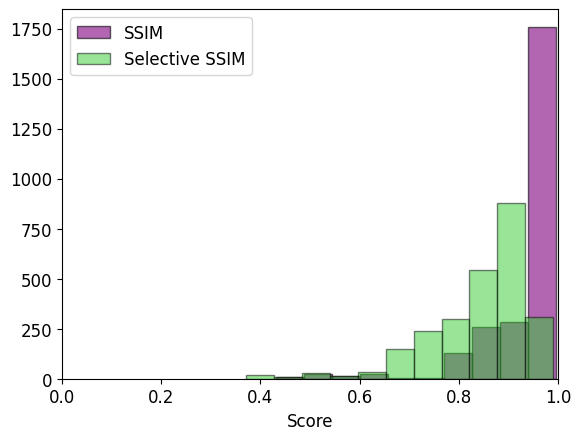

In [67]:
# n fold 0 

plt.figure()
plt.hist(fold_0_test_ssim, bins=10, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_0_test_sssim, bins=11, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("srcnn_results_10/ssim_distribution_test_0.png")

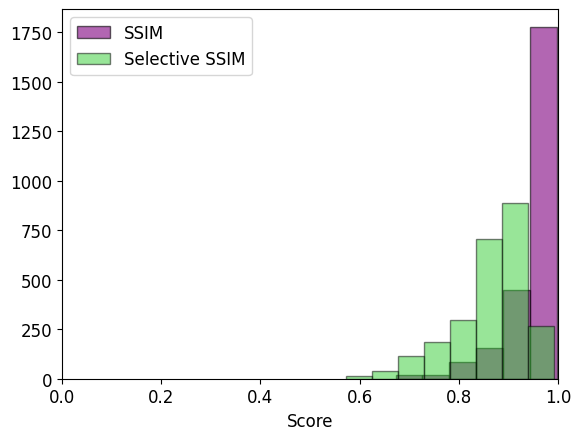

In [71]:
# n fold 1

plt.figure()
plt.hist(fold_1_test_ssim, bins=6, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_1_test_sssim, bins=8, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("srcnn_results_10/ssim_distribution_test_1.png")

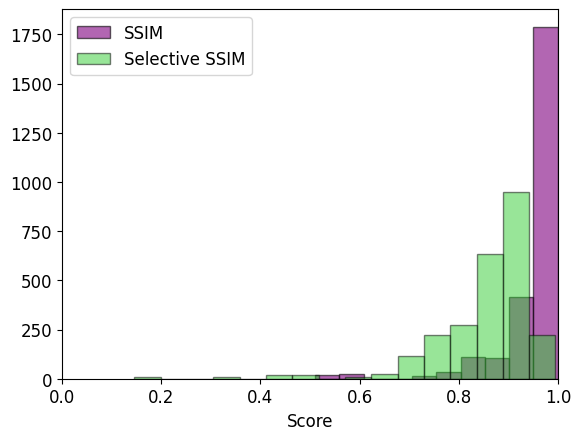

In [72]:
# n fold 2

plt.figure()
plt.hist(fold_2_test_ssim, bins=10, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_2_test_sssim, bins=16, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("srcnn_results_10/ssim_distribution_test_2.png")

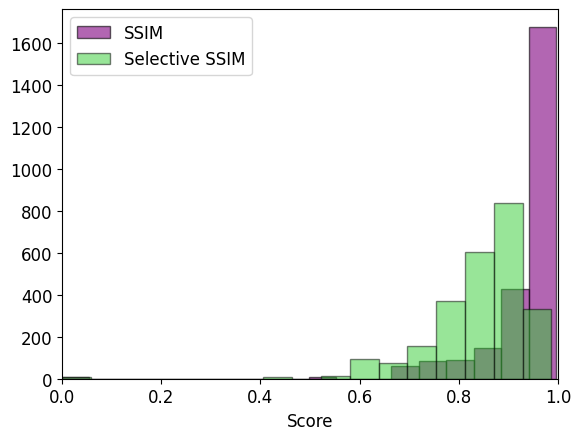

In [73]:
# n fold 3

plt.figure()
plt.hist(fold_3_test_ssim, bins=18, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_3_test_sssim, bins=17, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("srcnn_results_10/ssim_distribution_test_3.png")

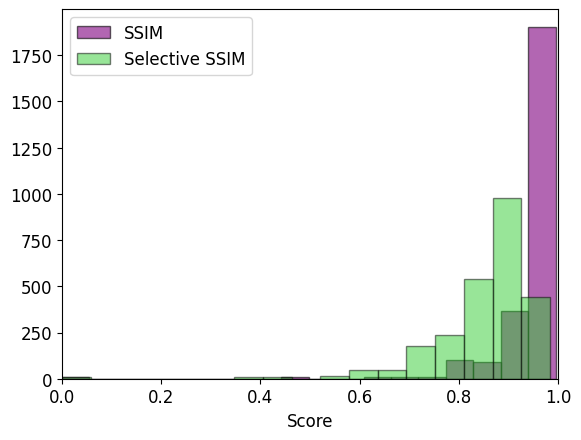

In [76]:
# n fold 4

plt.figure()
plt.hist(fold_4_test_ssim, bins=18, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_4_test_sssim, bins=17, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("srcnn_results_10/ssim_distribution_test_4.png")

### PSNR Comparison for each n-fold

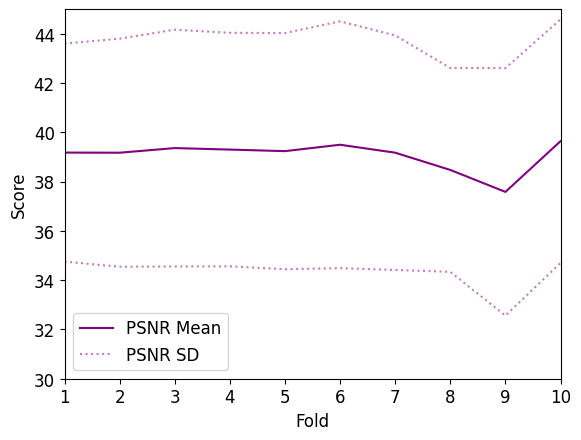

In [79]:
psnr_means = test_results_psnr_0.mean()
psnr_stds = test_results_psnr_0.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)
plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=45)
plt.savefig("srcnn_results_10/psnr_test_0.png")

In [80]:
print(psnr_means, psnr_stds)

0    39.178080
1    39.172293
2    39.360372
3    39.299685
4    39.236216
5    39.495807
6    39.173713
7    38.472972
8    37.582736
9    39.640476
dtype: float64 0    4.423832
1    4.627554
2    4.805353
3    4.738677
4    4.792216
5    5.008264
6    4.759478
7    4.136846
8    5.021950
9    4.943210
dtype: float64


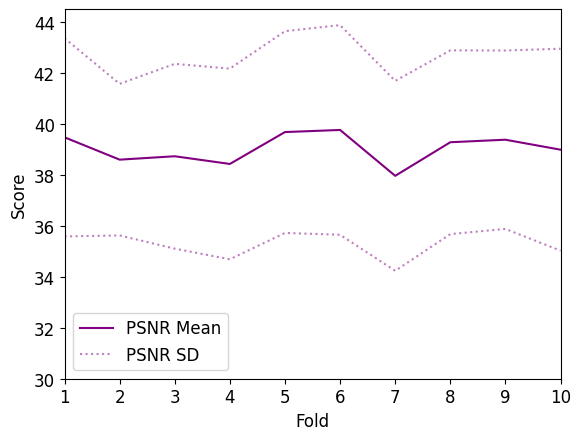

In [82]:
psnr_means = test_results_psnr_1.mean()
psnr_stds = test_results_psnr_1.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=44.5)
plt.savefig("srcnn_results_10/psnr_test_1.png")

In [83]:
print(psnr_means, psnr_stds)

0    39.470894
1    38.594489
2    38.727539
3    38.425858
4    39.676912
5    39.759495
6    37.959655
7    39.277611
8    39.376574
9    38.985279
dtype: float64 0    3.888973
1    2.973309
2    3.625266
3    3.739856
4    3.957485
5    4.112455
6    3.725524
7    3.604078
8    3.499384
9    3.961134
dtype: float64


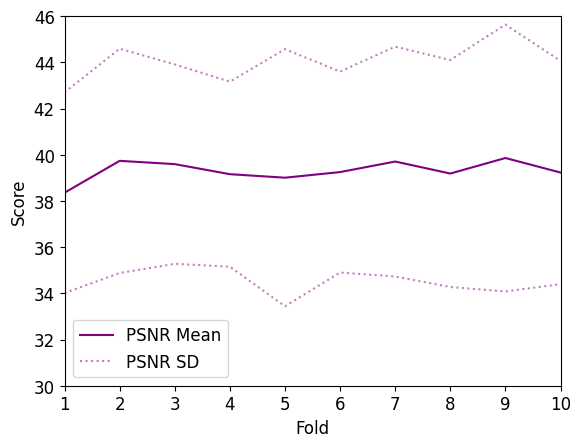

In [86]:
psnr_means = test_results_psnr_2.mean()
psnr_stds = test_results_psnr_2.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=46)
plt.savefig("srcnn_results_10/psnr_test_2.png")

In [87]:
print(psnr_means, psnr_stds)

0    38.355008
1    39.734711
2    39.593025
3    39.157365
4    39.005278
5    39.248770
6    39.705078
7    39.185725
8    39.857860
9    39.228785
dtype: float64 0    4.341953
1    4.854608
2    4.316627
3    4.004116
4    5.565676
5    4.348741
6    4.975193
7    4.913014
8    5.776129
9    4.831805
dtype: float64


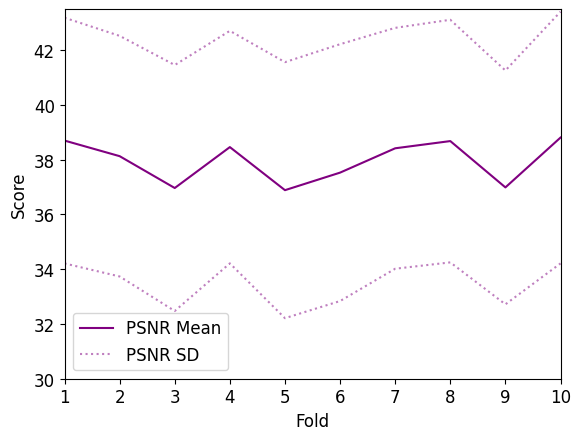

In [88]:
psnr_means = test_results_psnr_3.mean()
psnr_stds = test_results_psnr_3.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=43.5)
plt.savefig("srcnn_results_10/psnr_test_3.png")

In [89]:
print(psnr_means, psnr_stds)

0    38.698591
1    38.128878
2    36.965812
3    38.460204
4    36.887128
5    37.528159
6    38.416804
7    38.680164
8    36.988127
9    38.808849
dtype: float64 0    4.487207
1    4.394410
2    4.492200
3    4.246724
4    4.675697
5    4.690729
6    4.398888
7    4.430616
8    4.270274
9    4.597060
dtype: float64


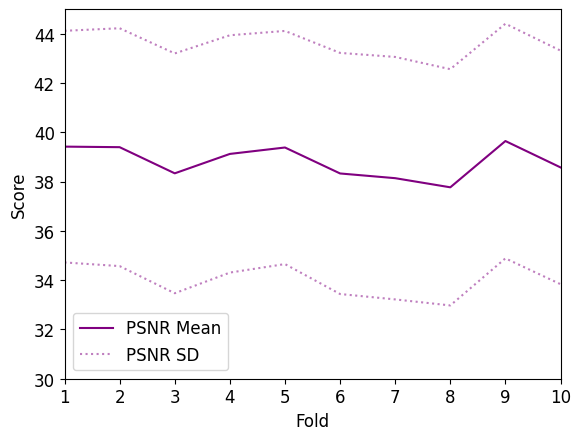

In [91]:
psnr_means = test_results_psnr_4.mean()
psnr_stds = test_results_psnr_4.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=45)
plt.savefig("srcnn_results_10/psnr_test_4.png")

In [92]:
print(psnr_means, psnr_stds)

0    39.419529
1    39.397266
2    38.335715
3    39.123483
4    39.383879
5    38.330327
6    38.138992
7    37.768335
8    39.646497
9    38.576249
dtype: float64 0    4.700118
1    4.826608
2    4.866397
3    4.815807
4    4.731375
5    4.892910
6    4.920179
7    4.794084
8    4.761381
9    4.739652
dtype: float64


### PSNR vals for all n-folds combined

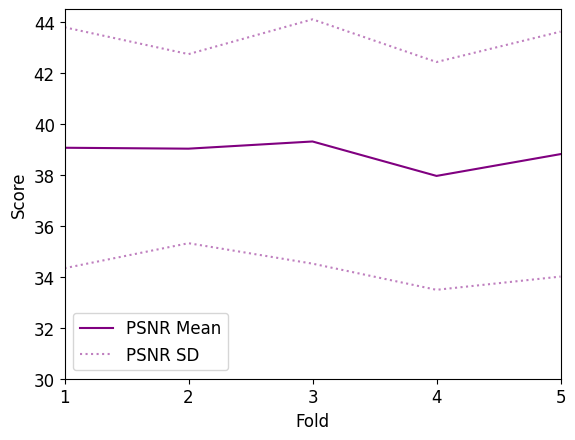

In [93]:
psnr_means_0 = test_results_psnr_0.mean()
psnr_stds_0 = test_results_psnr_0.std()
psnr_std_upper_0 = psnr_means_0 + psnr_stds_0
psnr_std_lower_0 = psnr_means_0 - psnr_stds_0
psnr_means_0 = psnr_means_0.mean()
psnr_stds_0 = psnr_stds_0.mean()
psnr_std_upper_0 = psnr_std_upper_0.mean()
psnr_std_lower_0 = psnr_std_lower_0.mean()

psnr_means_1 = test_results_psnr_1.mean()
psnr_stds_1 = test_results_psnr_1.std()
psnr_std_upper_1 = psnr_means_1 + psnr_stds_1
psnr_std_lower_1 = psnr_means_1 - psnr_stds_1
psnr_means_1 = psnr_means_1.mean()
psnr_stds_1 = psnr_stds_1.mean()
psnr_std_upper_1 = psnr_std_upper_1.mean()
psnr_std_lower_1 = psnr_std_lower_1.mean()

psnr_means_2 = test_results_psnr_2.mean()
psnr_stds_2 = test_results_psnr_2.std()
psnr_std_upper_2 = psnr_means_2 + psnr_stds_2
psnr_std_lower_2 = psnr_means_2 - psnr_stds_2
psnr_means_2 = psnr_means_2.mean()
psnr_stds_2 = psnr_stds_2.mean()
psnr_std_upper_2 = psnr_std_upper_2.mean()
psnr_std_lower_2 = psnr_std_lower_2.mean()

psnr_means_3 = test_results_psnr_3.mean()
psnr_stds_3 = test_results_psnr_3.std()
psnr_std_upper_3 = psnr_means_3 + psnr_stds_3
psnr_std_lower_3 = psnr_means_3 - psnr_stds_3
psnr_means_3 = psnr_means_3.mean()
psnr_stds_3 = psnr_stds_3.mean()
psnr_std_upper_3 = psnr_std_upper_3.mean()
psnr_std_lower_3 = psnr_std_lower_3.mean()

psnr_means_4 = test_results_psnr_4.mean()
psnr_stds_4 = test_results_psnr_4.std()
psnr_std_upper_4 = psnr_means_4 + psnr_stds_4
psnr_std_lower_4 = psnr_means_4 - psnr_stds_4
psnr_means_4 = psnr_means_4.mean()
psnr_stds_4 = psnr_stds_4.mean()
psnr_std_upper_4 = psnr_std_upper_4.mean()
psnr_std_lower_4 = psnr_std_lower_4.mean()

psnr_means = [psnr_means_0, psnr_means_1, psnr_means_2, psnr_means_3, psnr_means_4]
psnr_stds = [psnr_stds_0, psnr_stds_1, psnr_stds_2, psnr_stds_3, psnr_stds_4]
psnr_std_upper = [psnr_std_upper_0, psnr_std_upper_1, psnr_std_upper_2, psnr_std_upper_3, psnr_std_upper_4]
psnr_std_lower = [psnr_std_lower_0, psnr_std_lower_1, psnr_std_lower_2, psnr_std_lower_3, psnr_std_lower_4]


n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(n_folds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=30, ymax=44.5)
plt.savefig("srcnn_results_10/psnr_test_mean_all_folds.png")

In [94]:
print(psnr_means, psnr_stds)

[39.0612351390945, 39.02543057977441, 39.30716051808391, 37.95627174149472, 38.81202724654361] [4.725737980625854, 3.7087464213795913, 4.792786224701366, 4.468380471834898, 4.804851063017826]


### PSNR means and stds over all n-folds

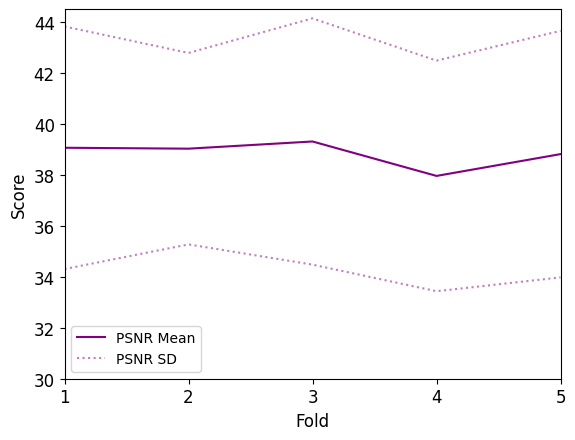

In [13]:
fold_0_test_psnr = np.array(test_results_psnr_0).reshape(-1,1)
fold_1_test_psnr = np.array(test_results_psnr_1).reshape(-1,1)
fold_2_test_psnr = np.array(test_results_psnr_2).reshape(-1,1)
fold_3_test_psnr = np.array(test_results_psnr_3).reshape(-1,1)
fold_4_test_psnr = np.array(test_results_psnr_4).reshape(-1,1)

psnr_means_0 = np.mean(fold_0_test_psnr)
psnr_std_0 = np.std(fold_0_test_psnr)
psnr_std_upper_0 = psnr_means_0 + psnr_std_0
psnr_std_lower_0 = psnr_means_0 - psnr_std_0

psnr_means_1 = np.mean(fold_1_test_psnr)
psnr_std_1 = np.std(fold_1_test_psnr)
psnr_std_upper_1 = psnr_means_1 + psnr_std_1
psnr_std_lower_1 = psnr_means_1 - psnr_std_1

psnr_means_2 = np.mean(fold_2_test_psnr)
psnr_std_2 = np.std(fold_2_test_psnr)
psnr_std_upper_2 = psnr_means_2 + psnr_std_2
psnr_std_lower_2 = psnr_means_2 - psnr_std_2

psnr_means_3 = np.mean(fold_3_test_psnr)
psnr_std_3 = np.std(fold_3_test_psnr)
psnr_std_upper_3 = psnr_means_3 + psnr_std_3
psnr_std_lower_3 = psnr_means_3 - psnr_std_3

psnr_means_4 = np.mean(fold_4_test_psnr)
psnr_std_4 = np.std(fold_4_test_psnr)
psnr_std_upper_4 = psnr_means_4 + psnr_std_4
psnr_std_lower_4 = psnr_means_4 - psnr_std_4
    
psnr_means = [psnr_means_0, psnr_means_1, psnr_means_2, psnr_means_3, psnr_means_4]
psnr_stds = [psnr_std_0, psnr_std_1, psnr_std_2, psnr_std_3, psnr_std_4]
psnr_std_upper = [psnr_std_upper_0, psnr_std_upper_1, psnr_std_upper_2, psnr_std_upper_3, psnr_std_upper_4]
psnr_std_lower = [psnr_std_lower_0, psnr_std_lower_1, psnr_std_lower_2, psnr_std_lower_3, psnr_std_lower_4]

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(n_folds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],["1","2","3","4","5"],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=30, ymax=44.5)
plt.savefig("srcnn_results_10/psnr_test_mean_std_all_folds.png")

In [14]:
print(psnr_means, psnr_stds)

[39.0612351390945, 39.02543057977441, 39.30716051808391, 37.95627174149472, 38.81202724654361] [4.757941219900438, 3.7555460751119605, 4.83134087004905, 4.523498349840928, 4.836142179646137]


### Distribution of PSNR values

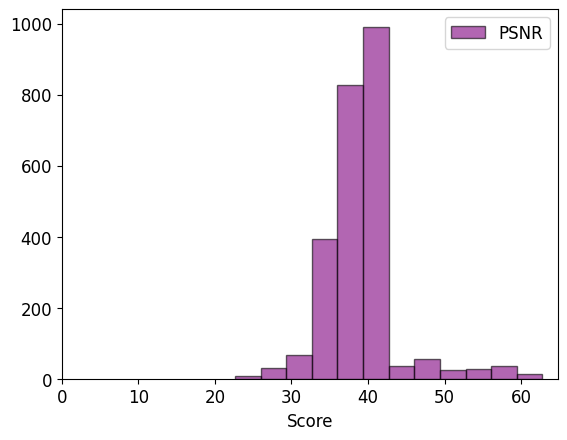

In [100]:
# n fold 0
plt.figure()
plt.hist(fold_0_test_psnr, bins=12, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("srcnn_results_10/psnr_distribution_test_0.png")

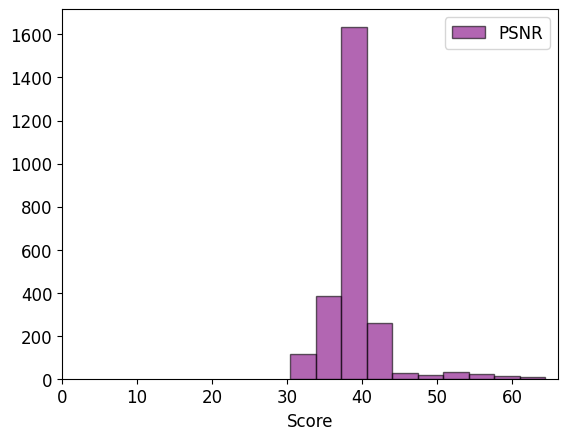

In [101]:
# n fold 1
plt.figure()
plt.hist(fold_1_test_psnr, bins=10, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("srcnn_results_10/psnr_distribution_test_1.png")

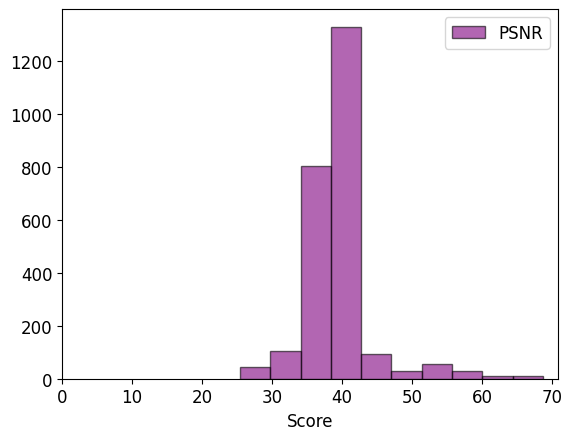

In [102]:
# n fold 2
plt.figure()
plt.hist(fold_2_test_psnr, bins=10, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("srcnn_results_10/psnr_distribution_test_2.png")

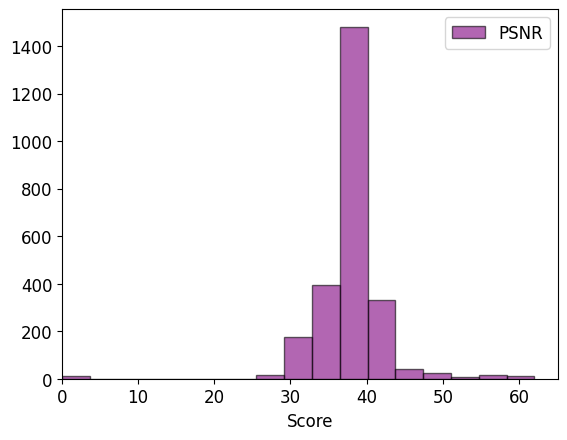

In [105]:
# n fold 3
plt.figure()
plt.hist(fold_3_test_psnr, bins=17, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("srcnn_results_10/psnr_distribution_test_3.png")

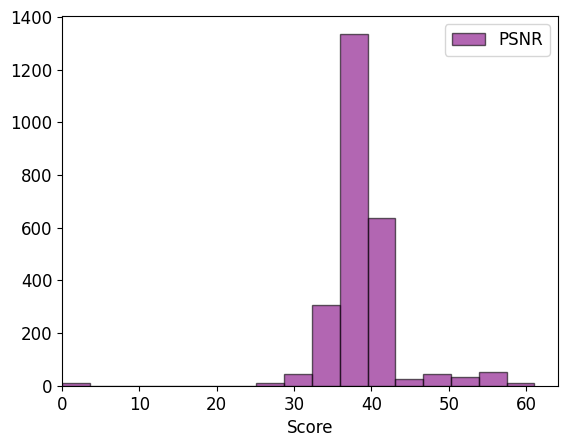

In [107]:
# n fold 4
plt.figure()
plt.hist(fold_4_test_psnr, bins=17, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("srcnn_results_10/psnr_distribution_test_4.png")

## Visualize Train Set

### Results for each n-fold

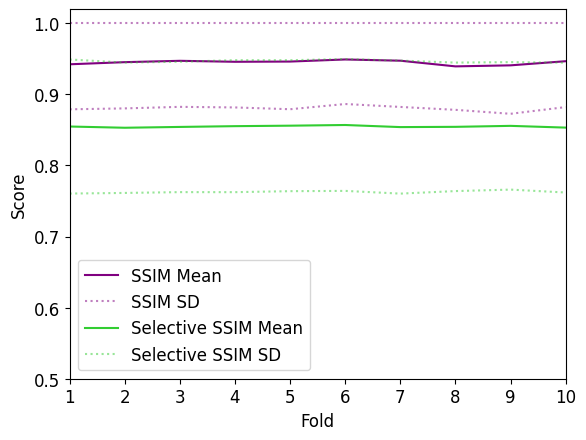

In [113]:
ssim_means = train_results_ssim_0.mean()
ssim_stds = train_results_ssim_0.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1

sssim_means = train_results_sssim_0.mean()
sssim_stds = train_results_sssim_0.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10/ssim_train_0.png")

In [114]:
print(ssim_means, ssim_stds)

0    0.942387
1    0.945389
2    0.947280
3    0.945906
4    0.946229
5    0.949165
6    0.947431
7    0.939454
8    0.940896
9    0.946714
dtype: float64 0    0.063348
1    0.065054
2    0.064782
3    0.064227
4    0.067076
5    0.062671
6    0.065052
7    0.061158
8    0.068155
9    0.064547
dtype: float64


In [115]:
print(sssim_means, sssim_stds)

0    0.854832
1    0.853095
2    0.854253
3    0.855337
4    0.856012
5    0.856969
6    0.854020
7    0.854380
8    0.855756
9    0.853307
dtype: float64 0    0.094301
1    0.091718
2    0.091720
3    0.092855
4    0.092136
5    0.092709
6    0.093583
7    0.090382
8    0.089681
9    0.091328
dtype: float64


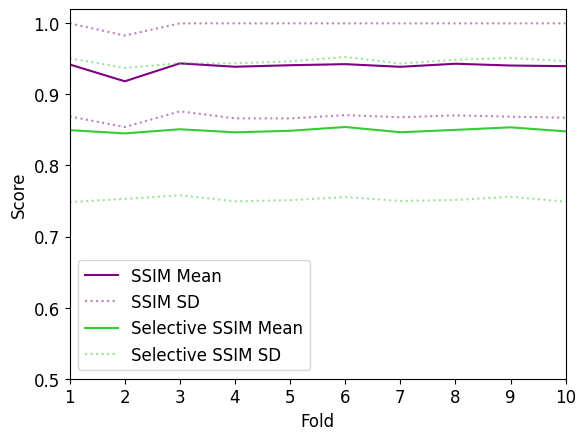

In [116]:
ssim_means = train_results_ssim_1.mean()
ssim_stds = train_results_ssim_1.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1

sssim_means = train_results_sssim_1.mean()
sssim_stds = train_results_sssim_1.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10/ssim_train_1.png")

In [117]:
print(ssim_means, ssim_stds)

0    0.942151
1    0.918453
2    0.943653
3    0.938935
4    0.941057
5    0.942580
6    0.938840
7    0.943152
8    0.940649
9    0.939743
dtype: float64 0    0.073050
1    0.064357
2    0.067420
3    0.072579
4    0.074895
5    0.071707
6    0.070966
7    0.072637
8    0.071971
9    0.072520
dtype: float64


In [118]:
print(sssim_means, sssim_stds)

0    0.849719
1    0.845171
2    0.850979
3    0.846665
4    0.848836
5    0.854166
6    0.846772
7    0.850106
8    0.853707
9    0.848001
dtype: float64 0    0.101206
1    0.092162
2    0.092839
3    0.097077
4    0.097626
5    0.098545
6    0.096674
7    0.098599
8    0.097629
9    0.098894
dtype: float64


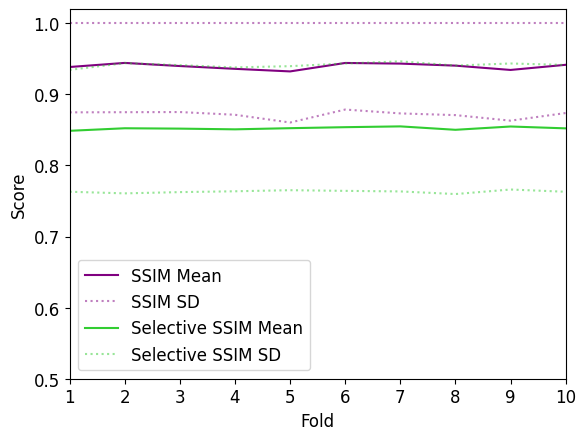

In [119]:
ssim_means = train_results_ssim_2.mean()
ssim_stds = train_results_ssim_2.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = train_results_sssim_2.mean()
sssim_stds = train_results_sssim_2.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10/ssim_train_2.png")

In [120]:
print(ssim_means, ssim_stds)

0    0.938577
1    0.944317
2    0.939927
3    0.935984
4    0.932359
5    0.944256
6    0.943353
7    0.940485
8    0.934424
9    0.941654
dtype: float64 0    0.063815
1    0.069338
2    0.064736
3    0.064619
4    0.071897
5    0.065549
6    0.070078
7    0.069615
8    0.071362
9    0.067846
dtype: float64


In [121]:
print(sssim_means, sssim_stds)

0    0.848795
1    0.852387
2    0.851864
3    0.850862
4    0.852496
5    0.853896
6    0.855022
7    0.850215
8    0.854857
9    0.852250
dtype: float64 0    0.085730
1    0.091609
2    0.089316
3    0.087143
4    0.087255
5    0.089597
6    0.091508
7    0.090396
8    0.088658
9    0.089218
dtype: float64


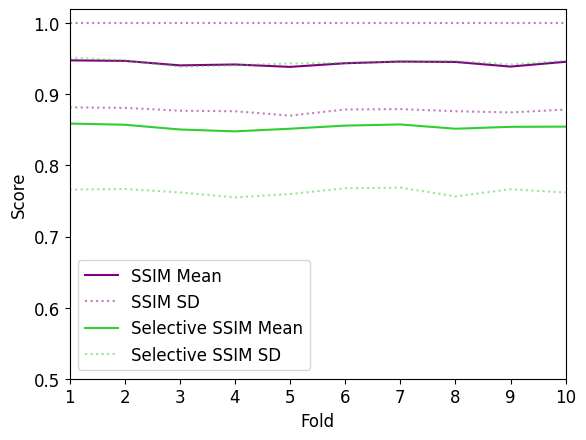

In [122]:
ssim_means = train_results_ssim_3.mean()
ssim_stds = train_results_ssim_3.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = train_results_sssim_3.mean()
sssim_stds = train_results_sssim_3.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10/ssim_train_3.png")

In [123]:
print(ssim_means, ssim_stds)

0    0.947934
1    0.947173
2    0.940861
3    0.942108
4    0.938723
5    0.943872
6    0.946225
7    0.945674
8    0.939155
9    0.945908
dtype: float64 0    0.066148
1    0.066074
2    0.063790
3    0.065804
4    0.068533
5    0.065043
6    0.066907
7    0.069328
8    0.064484
9    0.067198
dtype: float64


In [124]:
print(sssim_means, sssim_stds)

0    0.858992
1    0.857330
2    0.850662
3    0.848005
4    0.851745
5    0.856113
6    0.857749
7    0.851710
8    0.854386
9    0.854674
dtype: float64 0    0.092856
1    0.090403
2    0.088507
3    0.092903
4    0.091862
5    0.088161
6    0.088851
7    0.095161
8    0.087764
9    0.092727
dtype: float64


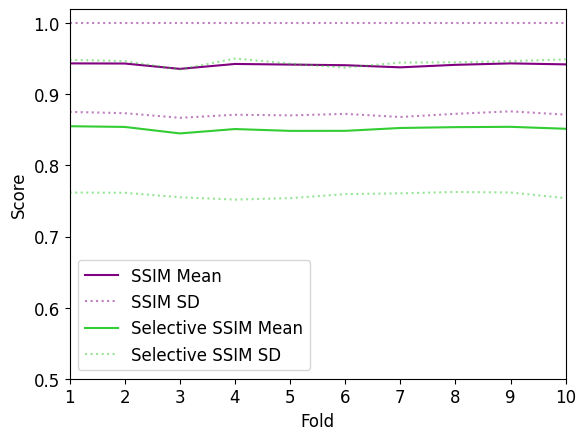

In [125]:
ssim_means = train_results_ssim_4.mean()
ssim_stds = train_results_ssim_4.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = train_results_sssim_4.mean()
sssim_stds = train_results_sssim_4.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10/ssim_train_4.png")

In [126]:
print(sssim_means, sssim_stds)

0    0.855258
1    0.854245
2    0.845125
3    0.851275
4    0.848699
5    0.848749
6    0.852773
7    0.853947
8    0.854402
9    0.851672
dtype: float64 0    0.093366
1    0.092629
2    0.089848
3    0.099251
4    0.094647
5    0.089043
6    0.091979
7    0.091216
8    0.092428
9    0.097606
dtype: float64


In [127]:
print(ssim_means, ssim_stds)

0    0.943645
1    0.943450
2    0.935923
3    0.942853
4    0.941973
5    0.941092
6    0.938089
7    0.941623
8    0.943648
9    0.942261
dtype: float64 0    0.068229
1    0.069859
2    0.068850
3    0.071452
4    0.071457
5    0.068511
6    0.069851
7    0.068921
8    0.067463
9    0.070730
dtype: float64


### Results for all n-folds combined

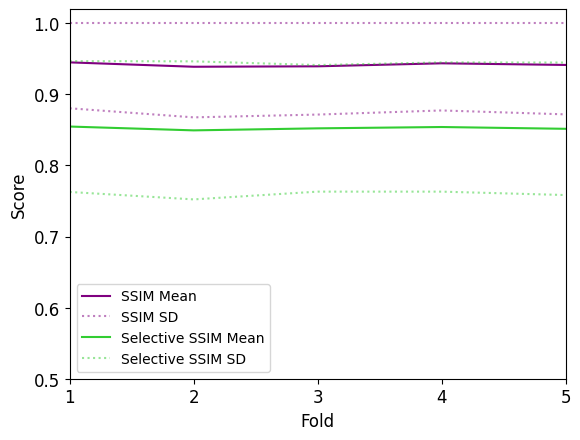

In [128]:
ssim_means_0 = train_results_ssim_0.mean()
ssim_stds_0 = train_results_ssim_0.std()
ssim_std_upper_0 = ssim_means_0 + ssim_stds_0
ssim_std_lower_0 = ssim_means_0 - ssim_stds_0
ssim_means_0 = ssim_means_0.mean()
ssim_stds_0 = ssim_stds_0.mean()
ssim_std_upper_0 = ssim_std_upper_0.mean()
ssim_std_lower_0 = ssim_std_lower_0.mean()

ssim_means_1 = train_results_ssim_1.mean()
ssim_stds_1 = train_results_ssim_1.std()
ssim_std_upper_1 = ssim_means_1 + ssim_stds_1
ssim_std_lower_1 = ssim_means_1 - ssim_stds_1
ssim_means_1 = ssim_means_1.mean()
ssim_stds_1 = ssim_stds_1.mean()
ssim_std_upper_1 = ssim_std_upper_1.mean()
ssim_std_lower_1 = ssim_std_lower_1.mean()

ssim_means_2 = train_results_ssim_2.mean()
ssim_stds_2 = train_results_ssim_2.std()
ssim_std_upper_2 = ssim_means_2 + ssim_stds_2
ssim_std_lower_2 = ssim_means_2 - ssim_stds_2
ssim_means_2 = ssim_means_2.mean()
ssim_stds_2 = ssim_stds_2.mean()
ssim_std_upper_2 = ssim_std_upper_2.mean()
ssim_std_lower_2 = ssim_std_lower_2.mean()

ssim_means_3 = train_results_ssim_3.mean()
ssim_stds_3 = train_results_ssim_3.std()
ssim_std_upper_3 = ssim_means_3 + ssim_stds_3
ssim_std_lower_3 = ssim_means_3 - ssim_stds_3
ssim_means_3 = ssim_means_3.mean()
ssim_stds_3 = ssim_stds_3.mean()
ssim_std_upper_3 = ssim_std_upper_3.mean()
ssim_std_lower_3 = ssim_std_lower_3.mean()

ssim_means_4 = train_results_ssim_4.mean()
ssim_stds_4 = train_results_ssim_4.std()
ssim_std_upper_4 = ssim_means_4 + ssim_stds_4
ssim_std_lower_4 = ssim_means_4 - ssim_stds_4
ssim_means_4 = ssim_means_4.mean()
ssim_stds_4 = ssim_stds_4.mean()
ssim_std_upper_4 = ssim_std_upper_4.mean()
ssim_std_lower_4 = ssim_std_lower_4.mean()

ssim_means = [ssim_means_0, ssim_means_1, ssim_means_2, ssim_means_3, ssim_means_4]
ssim_stds = [ssim_stds_0, ssim_stds_1, ssim_stds_2, ssim_stds_3, ssim_stds_4]
ssim_std_upper = [ssim_std_upper_0, ssim_std_upper_1, ssim_std_upper_2, ssim_std_upper_3, ssim_std_upper_4]
ssim_std_lower = [ssim_std_lower_0, ssim_std_lower_1, ssim_std_lower_2, ssim_std_lower_3, ssim_std_lower_4]

for i in range(len(ssim_std_upper)):
    if ssim_std_upper[i] > 1:
        ssim_std_upper[i] = 1

sssim_means_0 = train_results_sssim_0.mean()
sssim_stds_0 = train_results_sssim_0.std()
sssim_std_upper_0 = sssim_means_0 + sssim_stds_0
sssim_std_lower_0 = sssim_means_0 - sssim_stds_0
sssim_means_0 = sssim_means_0.mean()
sssim_stds_0 = sssim_stds_0.mean()
sssim_std_upper_0 = sssim_std_upper_0.mean()
sssim_std_lower_0 = sssim_std_lower_0.mean()

sssim_means_1 = train_results_sssim_1.mean()
sssim_stds_1 = train_results_sssim_1.std()
sssim_std_upper_1 = sssim_means_1 + sssim_stds_1
sssim_std_lower_1 = sssim_means_1 - sssim_stds_1
sssim_means_1 = sssim_means_1.mean()
sssim_stds_1 = sssim_stds_1.mean()
sssim_std_upper_1 = sssim_std_upper_1.mean()
sssim_std_lower_1 = sssim_std_lower_1.mean()

sssim_means_2 = train_results_sssim_2.mean()
sssim_stds_2 = train_results_sssim_2.std()
sssim_std_upper_2 = sssim_means_2 + sssim_stds_2
sssim_std_lower_2 = sssim_means_2 - sssim_stds_2
sssim_means_2 = sssim_means_2.mean()
sssim_stds_2 = sssim_stds_2.mean()
sssim_std_upper_2 = sssim_std_upper_2.mean()
sssim_std_lower_2 = sssim_std_lower_2.mean()

sssim_means_3 = train_results_sssim_3.mean()
sssim_stds_3 = train_results_sssim_3.std()
sssim_std_upper_3 = sssim_means_3 + sssim_stds_3
sssim_std_lower_3 = sssim_means_3 - sssim_stds_3
sssim_means_3 = sssim_means_3.mean()
sssim_stds_3 = sssim_stds_3.mean()
sssim_std_upper_3 = sssim_std_upper_3.mean()
sssim_std_lower_3 = sssim_std_lower_3.mean()

sssim_means_4 = train_results_sssim_4.mean()
sssim_stds_4 = train_results_sssim_4.std()
sssim_std_upper_4 = sssim_means_4 + sssim_stds_4
sssim_std_lower_4 = sssim_means_4 - sssim_stds_4
sssim_means_4 = sssim_means_4.mean()
sssim_stds_4 = sssim_stds_4.mean()
sssim_std_upper_4 = sssim_std_upper_4.mean()
sssim_std_lower_4 = sssim_std_lower_4.mean()

sssim_means = [sssim_means_0, sssim_means_1, sssim_means_2, sssim_means_3, sssim_means_4]
sssim_stds = [sssim_stds_0, sssim_stds_1, sssim_stds_2, sssim_stds_3, sssim_stds_4]
sssim_std_upper = [sssim_std_upper_0, sssim_std_upper_1, sssim_std_upper_2, sssim_std_upper_3, sssim_std_upper_4]
sssim_std_lower = [sssim_std_lower_0, sssim_std_lower_1, sssim_std_lower_2, sssim_std_lower_3, sssim_std_lower_4]

for i in range(len(sssim_std_upper)):
    if sssim_std_upper[i] > 1:
        sssim_std_upper[i] = 1

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(n_folds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(n_folds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(n_folds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)


plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],["1","2","3","4","5"],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10/ssim_train_mean_all_folds.png")

In [129]:
print(ssim_means, ssim_stds)

[0.9450851000572549, 0.9389213895460344, 0.9395336214597695, 0.9437632184182103, 0.9414557220900098] [0.06460685041477726, 0.07121025828731083, 0.06788559377986944, 0.06633082019173647, 0.06953227475333705]


In [130]:
print(sssim_means, sssim_stds)

[0.8547960903962762, 0.8494121617105241, 0.8522644327066583, 0.8541364589522071, 0.8516145762126401] [0.09204145036627598, 0.09712502312188054, 0.08904304508154713, 0.09091953836570432, 0.093201472233398]


### Mean and SD on all n-folds combined

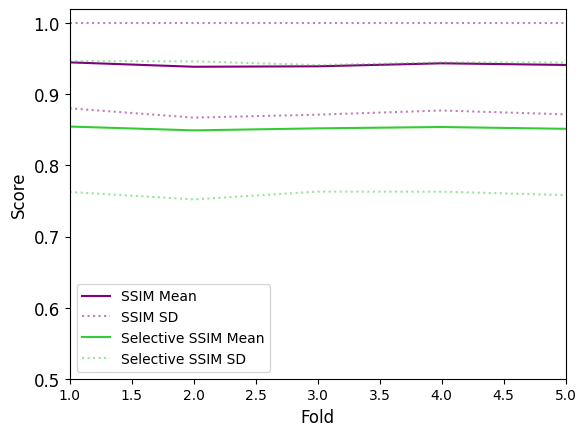

In [17]:
fold_0_train_ssim = np.array(train_results_ssim_0).reshape(-1,1)
fold_1_train_ssim = np.array(train_results_ssim_1).reshape(-1,1)
fold_2_train_ssim = np.array(train_results_ssim_2).reshape(-1,1)
fold_3_train_ssim = np.array(train_results_ssim_3).reshape(-1,1)
fold_4_train_ssim = np.array(train_results_ssim_4).reshape(-1,1)

ssim_means_0 = np.mean(fold_0_train_ssim)
ssim_std_0 = np.std(fold_0_train_ssim)
ssim_std_upper_0 = ssim_means_0 + ssim_std_0
ssim_std_lower_0 = ssim_means_0 - ssim_std_0
if ssim_std_upper_0 > 1:
    ssim_std_upper_0 = 1

ssim_means_1 = np.mean(fold_1_train_ssim)
ssim_std_1 = np.std(fold_1_train_ssim)
ssim_std_upper_1 = ssim_means_1 + ssim_std_1
ssim_std_lower_1 = ssim_means_1 - ssim_std_1
if ssim_std_upper_1 > 1:
    ssim_std_upper_1 = 1

ssim_means_2 = np.mean(fold_2_train_ssim)
ssim_std_2 = np.std(fold_2_train_ssim)
ssim_std_upper_2 = ssim_means_2 + ssim_std_2
ssim_std_lower_2 = ssim_means_2 - ssim_std_2
if ssim_std_upper_2 > 1:
    ssim_std_upper_2 = 1

ssim_means_3 = np.mean(fold_3_train_ssim)
ssim_std_3 = np.std(fold_3_train_ssim)
ssim_std_upper_3 = ssim_means_3 + ssim_std_3
ssim_std_lower_3 = ssim_means_3 - ssim_std_3
if ssim_std_upper_3 > 1:
    ssim_std_upper_3 = 1

ssim_means_4 = np.mean(fold_4_train_ssim)
ssim_std_4 = np.std(fold_4_train_ssim)
ssim_std_upper_4 = ssim_means_4 + ssim_std_4
ssim_std_lower_4 = ssim_means_4 - ssim_std_4
if ssim_std_upper_4 > 1:
    ssim_std_upper_4 = 1
    
ssim_means = [ssim_means_0, ssim_means_1, ssim_means_2, ssim_means_3, ssim_means_4]
ssim_stds = [ssim_std_0, ssim_std_1, ssim_std_2, ssim_std_3, ssim_std_4]
ssim_std_upper = [ssim_std_upper_0, ssim_std_upper_1, ssim_std_upper_2, ssim_std_upper_3, ssim_std_upper_4]
ssim_std_lower = [ssim_std_lower_0, ssim_std_lower_1, ssim_std_lower_2, ssim_std_lower_3, ssim_std_lower_4]

fold_0_train_sssim = np.array(train_results_sssim_0).reshape(-1,1)
fold_1_train_sssim = np.array(train_results_sssim_1).reshape(-1,1)
fold_2_train_sssim = np.array(train_results_sssim_2).reshape(-1,1)
fold_3_train_sssim = np.array(train_results_sssim_3).reshape(-1,1)
fold_4_train_sssim = np.array(train_results_sssim_4).reshape(-1,1)

sssim_means_0 = np.mean(fold_0_train_sssim)
sssim_std_0 = np.std(fold_0_train_sssim)
sssim_std_upper_0 = sssim_means_0 + sssim_std_0
sssim_std_lower_0 = sssim_means_0 - sssim_std_0
if sssim_std_upper_0 > 1:
    sssim_std_upper_0 = 1

sssim_means_1 = np.mean(fold_1_train_sssim)
sssim_std_1 = np.std(fold_1_train_sssim)
sssim_std_upper_1 = sssim_means_1 + sssim_std_1
sssim_std_lower_1 = sssim_means_1 - sssim_std_1
if sssim_std_upper_1 > 1:
    sssim_std_upper_1 = 1

sssim_means_2 = np.mean(fold_2_train_sssim)
sssim_std_2 = np.std(fold_2_train_sssim)
sssim_std_upper_2 = sssim_means_2 + sssim_std_2
sssim_std_lower_2 = sssim_means_2 - sssim_std_2
if sssim_std_upper_2 > 1:
    sssim_std_upper_2 = 1

sssim_means_3 = np.mean(fold_3_train_sssim)
sssim_std_3 = np.std(fold_3_train_sssim)
sssim_std_upper_3 = sssim_means_3 + sssim_std_3
sssim_std_lower_3 = sssim_means_3 - sssim_std_3
if sssim_std_upper_3 > 1:
    sssim_std_upper_3 = 1

sssim_means_4 = np.mean(fold_4_train_sssim)
sssim_std_4 = np.std(fold_4_train_sssim)
sssim_std_upper_4 = sssim_means_4 + sssim_std_4
sssim_std_lower_4 = sssim_means_4 - sssim_std_4
if sssim_std_upper_4 > 1:
    sssim_std_upper_4 = 1
    
    
sssim_means = [sssim_means_0, sssim_means_1, sssim_means_2, sssim_means_3, sssim_means_4]
sssim_stds = [sssim_std_0, sssim_std_1, sssim_std_2, sssim_std_3, sssim_std_4]
sssim_std_upper = [sssim_std_upper_0, sssim_std_upper_1, sssim_std_upper_2, sssim_std_upper_3, sssim_std_upper_4]
sssim_std_lower = [sssim_std_lower_0, sssim_std_lower_1, sssim_std_lower_2, sssim_std_lower_3, sssim_std_lower_4]

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(n_folds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(n_folds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(n_folds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)


plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.yticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10/ssim_train_mean_std_all_folds.png")


In [18]:
print(ssim_means, ssim_stds)

[0.9450851000572548, 0.9389213895460344, 0.9395336214597694, 0.9437632184182102, 0.9414557220900098] [0.06466746750239756, 0.07157426372528382, 0.06802235746735551, 0.06639042493465025, 0.06954792248426711]


In [19]:
print(sssim_means, sssim_stds)

[0.8547960903962762, 0.8494121617105242, 0.8522644327066582, 0.8541364589522072, 0.85161457621264] [0.09200732751045387, 0.09714655485874549, 0.08903193568367715, 0.09096259532078282, 0.09324984081622004]


### Distribution of SSIM/SSSIM Values

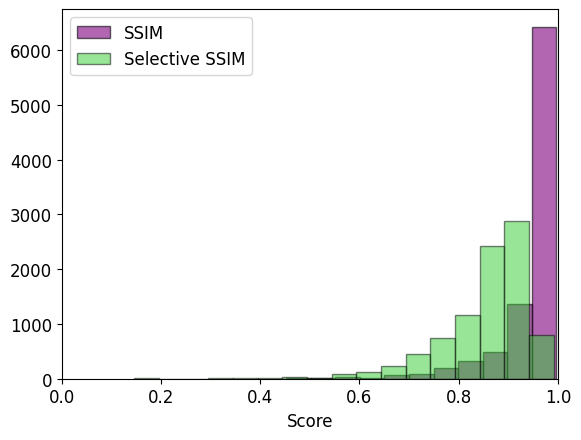

In [134]:
# n fold 0

plt.figure()
plt.hist(fold_0_train_ssim, bins=11, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_0_train_sssim, bins=17, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("srcnn_results_10/ssim_distribution_train_0.png")

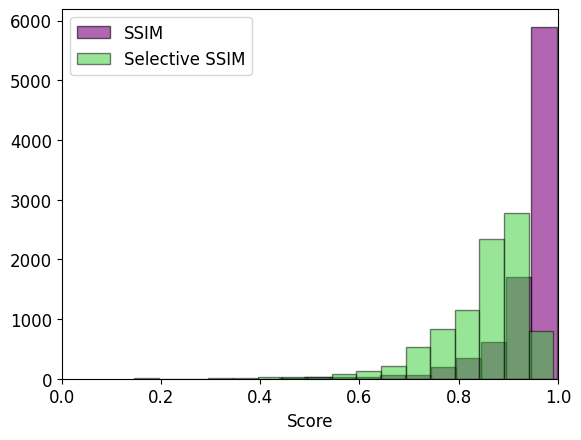

In [135]:
# n fold 1

plt.figure()
plt.hist(fold_1_train_ssim, bins=11, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_1_train_sssim, bins=17, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("srcnn_results_10/ssim_distribution_train_1.png")

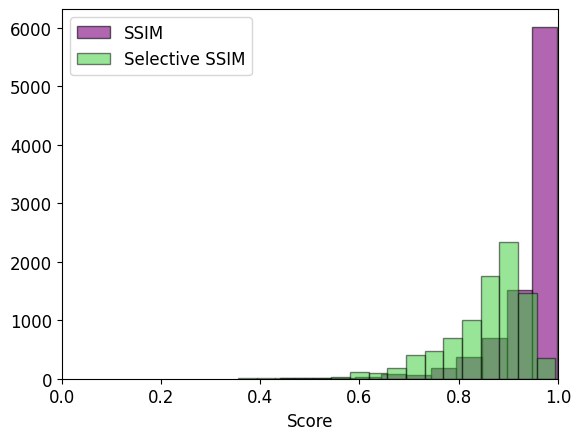

In [136]:
# n fold 2
plt.figure()
plt.hist(fold_2_train_ssim, bins=11, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_2_train_sssim, bins=17, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("srcnn_results_10/ssim_distribution_train_2.png")

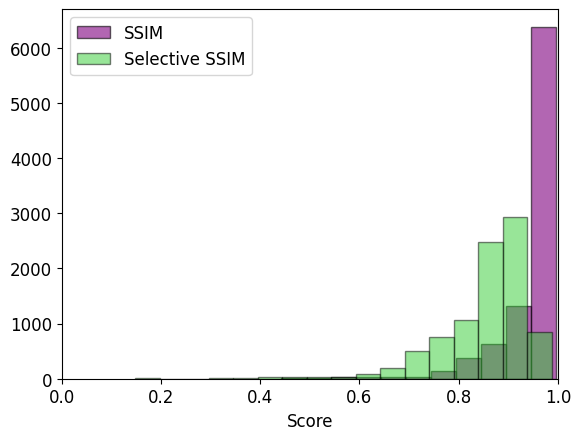

In [137]:
# n fold 3
plt.figure()
plt.hist(fold_3_train_ssim, bins=11, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_3_train_sssim, bins=17, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("srcnn_results_10/ssim_distribution_train_3.png")

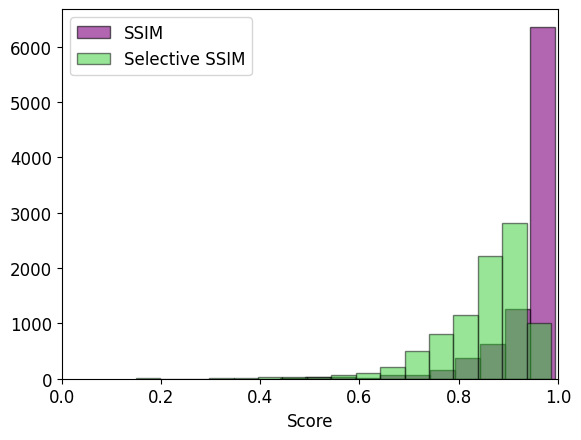

In [138]:
# n fold 4
plt.figure()
plt.hist(fold_4_train_ssim, bins=11, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_4_train_sssim, bins=17, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("srcnn_results_10/ssim_distribution_train_4.png")

### PSNR Results for each n-fold

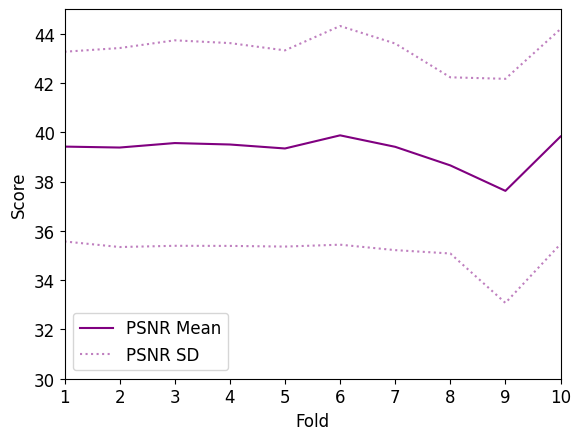

In [141]:
psnr_means = train_results_psnr_0.mean()
psnr_stds = train_results_psnr_0.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=45)
plt.savefig("srcnn_results_10/psnr_train_0.png")

In [142]:
print(psnr_means, psnr_stds)

0    39.420471
1    39.382611
2    39.564273
3    39.505755
4    39.344597
5    39.877480
6    39.411474
7    38.657740
8    37.623837
9    39.829401
dtype: float64 0    3.849719
1    4.037899
2    4.169361
3    4.115571
4    3.981405
5    4.437451
6    4.192536
7    3.574971
8    4.547338
9    4.364183
dtype: float64


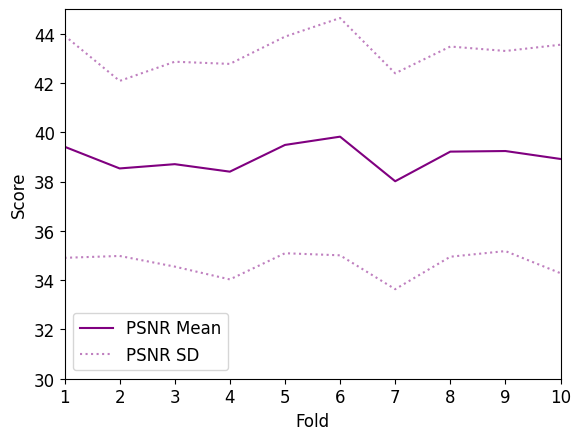

In [144]:
psnr_means = train_results_psnr_1.mean()
psnr_stds = train_results_psnr_1.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=45)
plt.savefig("srcnn_results_10/psnr_train_1.png")

In [145]:
print(psnr_means, psnr_stds)

0    39.415863
1    38.534265
2    38.707646
3    38.403427
4    39.488077
5    39.823750
6    38.014418
7    39.216574
8    39.240916
9    38.918593
dtype: float64 0    4.508987
1    3.551836
2    4.157504
3    4.373546
4    4.395010
5    4.815463
6    4.381296
7    4.265332
8    4.061012
9    4.636871
dtype: float64


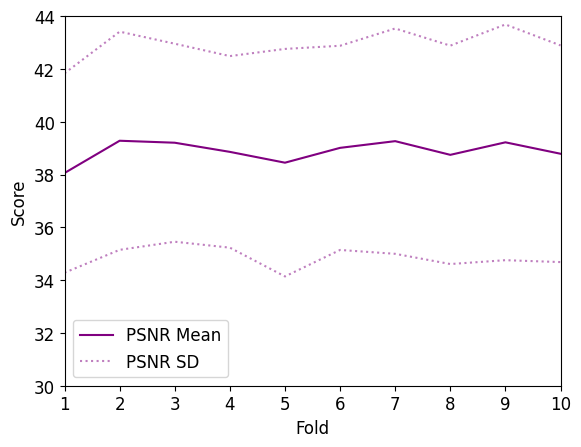

In [146]:
psnr_means = train_results_psnr_2.mean()
psnr_stds = train_results_psnr_2.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=44)
plt.savefig("srcnn_results_10/psnr_train_2.png")

In [147]:
print(psnr_means, psnr_stds)

0    38.056999
1    39.279478
2    39.204561
3    38.857940
4    38.448259
5    39.010174
6    39.264122
7    38.745398
8    39.219611
9    38.786649
dtype: float64 0    3.775955
1    4.132316
2    3.750327
3    3.628077
4    4.309395
5    3.867143
6    4.267911
7    4.136250
8    4.464291
9    4.103356
dtype: float64


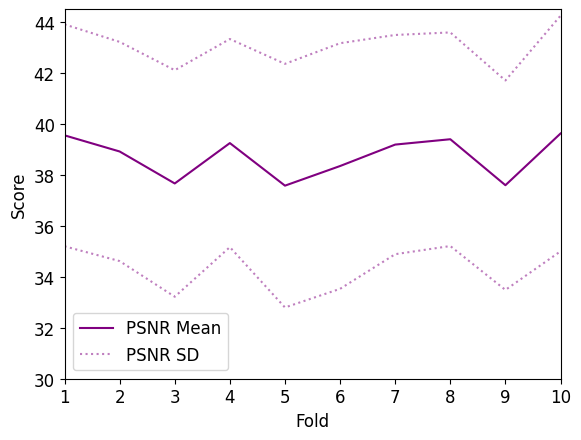

In [149]:
psnr_means = train_results_psnr_3.mean()
psnr_stds = train_results_psnr_3.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=44.5)
plt.savefig("srcnn_results_10/psnr_train_3.png")

In [150]:
print(psnr_means, psnr_stds)

0    39.548404
1    38.914703
2    37.660306
3    39.244742
4    37.574573
5    38.344471
6    39.185698
7    39.395501
8    37.591941
9    39.620254
dtype: float64 0    4.352470
1    4.299924
2    4.443511
3    4.082079
4    4.778789
5    4.818183
6    4.300131
7    4.190253
8    4.108522
9    4.621497
dtype: float64


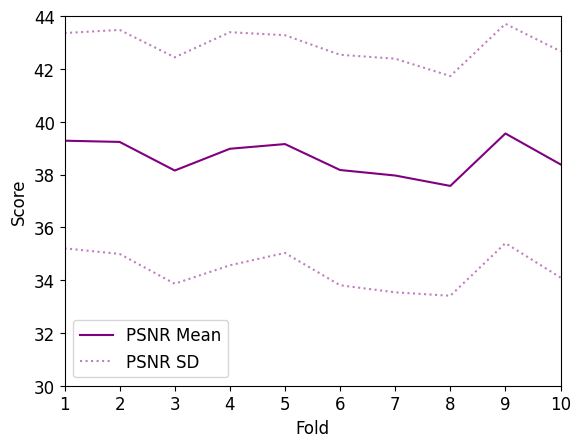

In [151]:
psnr_means = train_results_psnr_4.mean()
psnr_stds = train_results_psnr_4.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=44)
plt.savefig("srcnn_results_10/psnr_train_4.png")

In [152]:
print(psnr_means, psnr_stds)

0    39.281124
1    39.235082
2    38.151529
3    38.975681
4    39.153514
5    38.170779
6    37.962368
7    37.568305
8    39.554798
9    38.383926
dtype: float64 0    4.077186
1    4.243377
2    4.287857
3    4.414523
4    4.123388
5    4.364888
6    4.424883
7    4.161099
8    4.153693
9    4.286279
dtype: float64


### PSNR Results for all n-folds combined

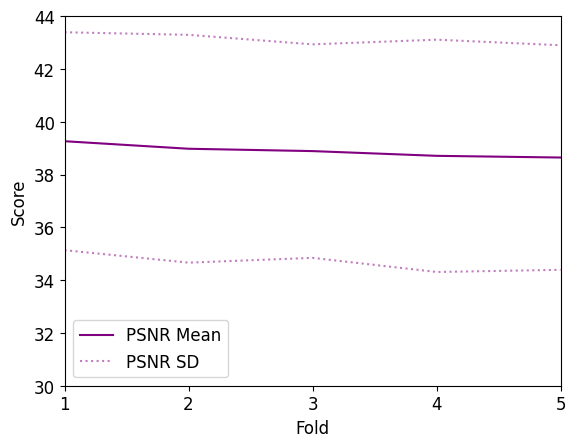

In [153]:
psnr_means_0 = train_results_psnr_0.mean()
psnr_stds_0 = train_results_psnr_0.std()
psnr_std_upper_0 = psnr_means_0 + psnr_stds_0
psnr_std_lower_0 = psnr_means_0 - psnr_stds_0
psnr_means_0 = psnr_means_0.mean()
psnr_stds_0 = psnr_stds_0.mean()
psnr_std_upper_0 = psnr_std_upper_0.mean()
psnr_std_lower_0 = psnr_std_lower_0.mean()

psnr_means_1 = train_results_psnr_1.mean()
psnr_stds_1 = train_results_psnr_1.std()
psnr_std_upper_1 = psnr_means_1 + psnr_stds_1
psnr_std_lower_1 = psnr_means_1 - psnr_stds_1
psnr_means_1 = psnr_means_1.mean()
psnr_stds_1 = psnr_stds_1.mean()
psnr_std_upper_1 = psnr_std_upper_1.mean()
psnr_std_lower_1 = psnr_std_lower_1.mean()

psnr_means_2 = train_results_psnr_2.mean()
psnr_stds_2 = train_results_psnr_2.std()
psnr_std_upper_2 = psnr_means_2 + psnr_stds_2
psnr_std_lower_2 = psnr_means_2 - psnr_stds_2
psnr_means_2 = psnr_means_2.mean()
psnr_stds_2 = psnr_stds_2.mean()
psnr_std_upper_2 = psnr_std_upper_2.mean()
psnr_std_lower_2 = psnr_std_lower_2.mean()

psnr_means_3 = train_results_psnr_3.mean()
psnr_stds_3 = train_results_psnr_3.std()
psnr_std_upper_3 = psnr_means_3 + psnr_stds_3
psnr_std_lower_3 = psnr_means_3 - psnr_stds_3
psnr_means_3 = psnr_means_3.mean()
psnr_stds_3 = psnr_stds_3.mean()
psnr_std_upper_3 = psnr_std_upper_3.mean()
psnr_std_lower_3 = psnr_std_lower_3.mean()

psnr_means_4 = train_results_psnr_4.mean()
psnr_stds_4 = train_results_psnr_4.std()
psnr_std_upper_4 = psnr_means_4 + psnr_stds_4
psnr_std_lower_4 = psnr_means_4 - psnr_stds_4
psnr_means_4 = psnr_means_4.mean()
psnr_stds_4 = psnr_stds_4.mean()
psnr_std_upper_4 = psnr_std_upper_4.mean()
psnr_std_lower_4 = psnr_std_lower_4.mean()

psnr_means = [psnr_means_0, psnr_means_1, psnr_means_2, psnr_means_3, psnr_means_4]
psnr_stds = [psnr_stds_0, psnr_stds_1, psnr_stds_2, psnr_stds_3, psnr_stds_4]
psnr_std_upper = [psnr_std_upper_0, psnr_std_upper_1, psnr_std_upper_2, psnr_std_upper_3, psnr_std_upper_4]
psnr_std_lower = [psnr_std_lower_0, psnr_std_lower_1, psnr_std_lower_2, psnr_std_lower_3, psnr_std_lower_4]


n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(n_folds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=30, ymax=44)
plt.savefig("srcnn_results_10/psnr_train_mean_all_folds.png")

In [154]:
print(psnr_means, psnr_stds)

[39.2617640348174, 38.976352892334795, 38.887319070094165, 38.70805918622626, 38.64371054243962] [4.1270432330702835, 4.314685743346653, 4.043502135418728, 4.399535897984382, 4.253717119309631]


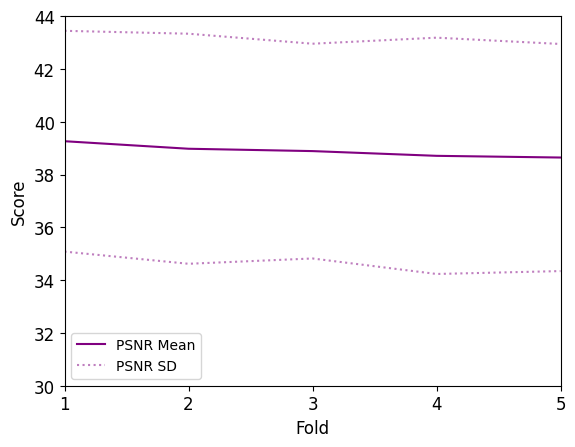

In [15]:
fold_0_train_psnr = np.array(train_results_psnr_0).reshape(-1,1)
fold_1_train_psnr = np.array(train_results_psnr_1).reshape(-1,1)
fold_2_train_psnr = np.array(train_results_psnr_2).reshape(-1,1)
fold_3_train_psnr = np.array(train_results_psnr_3).reshape(-1,1)
fold_4_train_psnr = np.array(train_results_psnr_4).reshape(-1,1)

psnr_means_0 = np.mean(fold_0_train_psnr)
psnr_std_0 = np.std(fold_0_train_psnr)
psnr_std_upper_0 = psnr_means_0 + psnr_std_0
psnr_std_lower_0 = psnr_means_0 - psnr_std_0

psnr_means_1 = np.mean(fold_1_train_psnr)
psnr_std_1 = np.std(fold_1_train_psnr)
psnr_std_upper_1 = psnr_means_1 + psnr_std_1
psnr_std_lower_1 = psnr_means_1 - psnr_std_1

psnr_means_2 = np.mean(fold_2_train_psnr)
psnr_std_2 = np.std(fold_2_train_psnr)
psnr_std_upper_2 = psnr_means_2 + psnr_std_2
psnr_std_lower_2 = psnr_means_2 - psnr_std_2

psnr_means_3 = np.mean(fold_3_train_psnr)
psnr_std_3 = np.std(fold_3_train_psnr)
psnr_std_upper_3 = psnr_means_3 + psnr_std_3
psnr_std_lower_3 = psnr_means_3 - psnr_std_3

psnr_means_4 = np.mean(fold_4_train_psnr)
psnr_std_4 = np.std(fold_4_train_psnr)
psnr_std_upper_4 = psnr_means_4 + psnr_std_4
psnr_std_lower_4 = psnr_means_4 - psnr_std_4
    
psnr_means = [psnr_means_0, psnr_means_1, psnr_means_2, psnr_means_3, psnr_means_4]
psnr_stds = [psnr_std_0, psnr_std_1, psnr_std_2, psnr_std_3, psnr_std_4]
psnr_std_upper = [psnr_std_upper_0, psnr_std_upper_1, psnr_std_upper_2, psnr_std_upper_3, psnr_std_upper_4]
psnr_std_lower = [psnr_std_lower_0, psnr_std_lower_1, psnr_std_lower_2, psnr_std_lower_3, psnr_std_lower_4]

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(n_folds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],["1","2","3","4","5"],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=30, ymax=44)
plt.savefig("srcnn_results_10/psnr_train_mean_std_all_folds.png")


In [16]:
print(psnr_means, psnr_stds)

[39.2617640348174, 38.976352892334795, 38.88731907009417, 38.70805918622626, 38.64371054243962] [4.181511277861103, 4.3573247187527695, 4.067327765239881, 4.475437931352785, 4.30101171295267]


### Distribution of PSNR Values

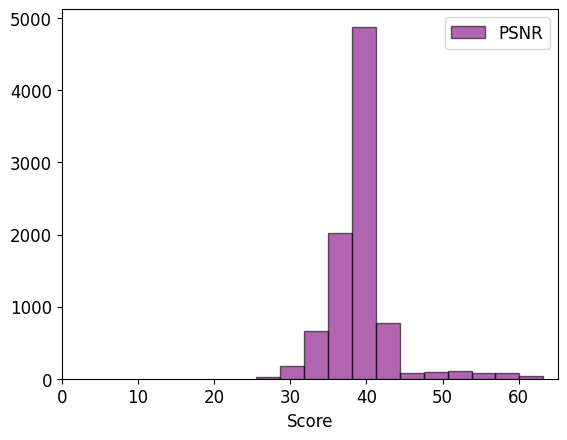

In [157]:
# n fold 0
plt.figure()
plt.hist(fold_0_train_psnr, bins=12, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("srcnn_results_10/psnr_distribution_train_0.png")

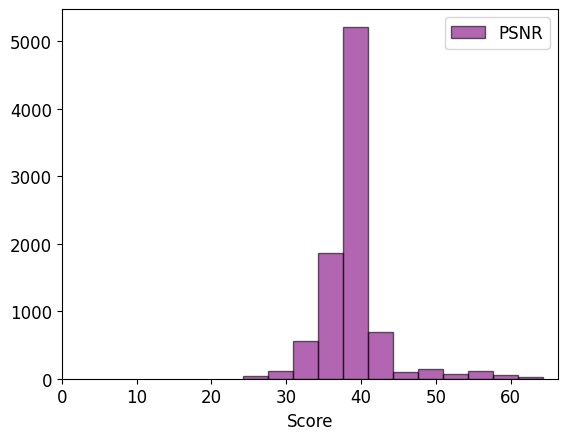

In [158]:
# n fold 1
plt.figure()
plt.hist(fold_1_train_psnr, bins=12, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("srcnn_results_10/psnr_distribution_train_1.png")

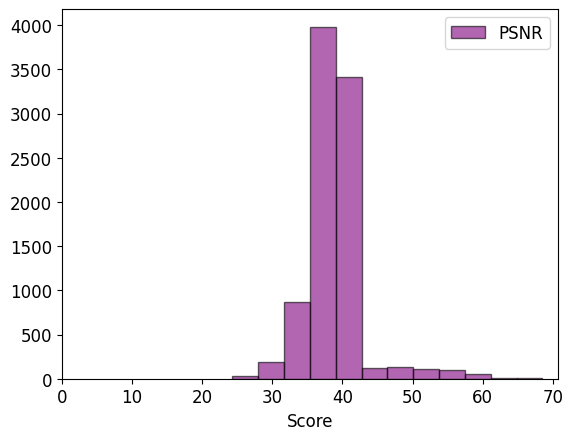

In [159]:
# n fold 2
plt.figure()
plt.hist(fold_2_train_psnr, bins=12, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("srcnn_results_10/psnr_distribution_train_2.png")

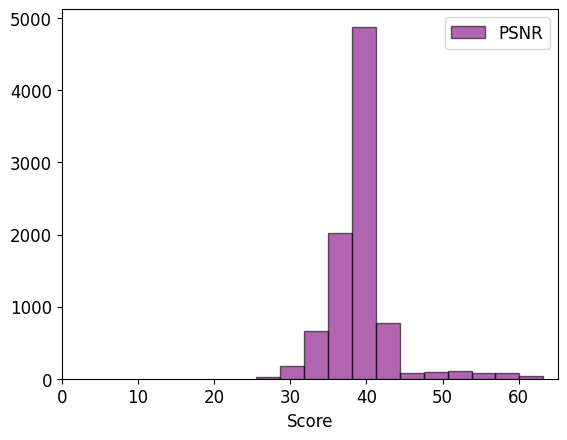

In [160]:
# n fold 3
plt.figure()
plt.hist(fold_0_train_psnr, bins=12, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("srcnn_results_10/psnr_distribution_train_3.png")

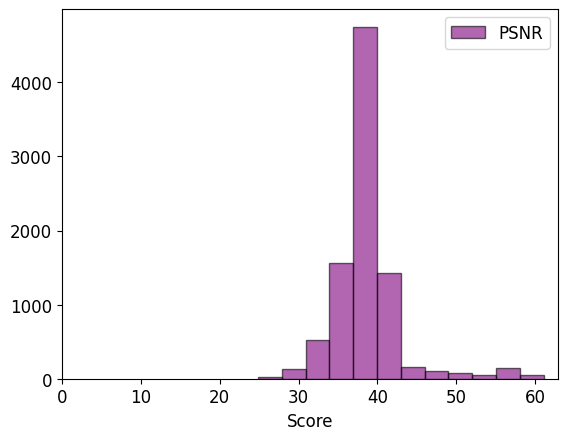

In [161]:
# n fold 4
plt.figure()
plt.hist(fold_4_train_psnr, bins=12, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("srcnn_results_10/psnr_distribution_train_4.png")